In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
import pandas as pd
import numpy as np
import os, json, time
from sklearn import metrics
from scipy.stats import pearsonr, spearmanr, zscore

# Get data and scores

In [2]:
# get group names for display purposes (and assert that names unique)
grp_names = json.load(open("./group_mappings.json"))
assert len(grp_names) == len(set(grp_names.values()))

In [3]:
all_data = json.load(open("./processed_data/oligo_lddt_processed.json"))
df = pd.DataFrame(all_data)

In [4]:
df

trg_name group_id mdl_id  \
0        H1106      003      1   
1        H1106      003      2   
2        H1106      003      3   
3        H1106      003      4   
4        H1106      003      5   
...        ...      ...    ...   
11124   T1192o      494      1   
11125   T1192o      494      2   
11126   T1192o      494      3   
11127   T1192o      494      4   
11128   T1192o      494      5   

                                       matched_lddts_ref  \
0      [21.3, 71.9, 73.2, 68.3, 65.5, 74.6, 86.4, 86....   
1      [55.1, 75.5, 71.2, 72.8, 64.8, 70.0, 80.4, 80....   
2      [54.2, 76.6, 75.4, 73.0, 71.1, 69.2, 80.4, 78....   
3      [56.2, 76.6, 76.5, 75.4, 65.1, 70.0, 80.4, 80....   
4      [17.9, 56.8, 42.7, 48.3, 62.9, 63.8, 73.7, 76....   
...                                                  ...   
11124  [46.2, 42.0, 63.3, 51.8, 61.9, 85.4, 81.5, 78....   
11125  [83.8, 85.8, 80.4, 69.0, 75.2, 82.0, 82.7, 84....   
11126  [45.5, 41.8, 64.5, 48.3, 60.4, 82.2, 78.5, 75....   
11127  [43.9, 51.9, 64.7, 62.3, 47.4, 51.9, 73.1, 48....   
11128  [74.3, 85.2, 80.9, 70.9, 71.3, 64.1, 73.9, 62....   

                                       matched_lddts_mdl  \
0      [76.4, 80.51, 81.13, 78.2, 82.19, 86.32, 88.8,...   
1      [69.65, 73.62, 79.75, 82.49, 86.52, 89.87, 91....   
2      [64.43, 69.19, 74.61, 79.48, 83.89, 86.23, 89....   
3      [68.65, 72.95, 77.63, 80.87, 84.22, 87.31, 89....   
4      [60.67, 60.65, 63.38, 61.61, 65.05, 65.6, 68.2...   
...                                                  ...   
11124  [82.68, 81.3, 81.15, 82.35, 79.61, 87.07, 84.4...   
11125  [67.2, 80.09, 78.87, 58.25, 65.42, 76.61, 77.5...   
11126  [81.25, 81.86, 81.66, 80.84, 72.69, 88.3, 83.1...   
11127  [74.82, 68.38, 75.44, 84.07, 74.96, 70.92, 75....   
11128  [77.15, 81.75, 68.7, 69.7, 58.78, 53.96, 80.17...   

                                        matched_res_nums  \
0      [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...   
1      [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...   
2      [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...   
3      [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...   
4      [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...   
...                                                  ...   
11124  [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 6...   
11125  [25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 3...   
11126  [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 6...   
11127  [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4...   
11128  [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 3...   

                                             chain_infos  \
0      [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
1      [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
2      [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
3      [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
4      [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
...                                                  ...   
11124  [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
11125  [{'mdl_ch_name': 'A', 'ref_ch_name': 'B', 'fir...   
11126  [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
11127  [{'mdl_ch_name': 'A', 'ref_ch_name': 'H', 'fir...   
11128  [{'mdl_ch_name': 'A', 'ref_ch_name': 'C', 'fir...   

                                       matched_ref_class  \
0      [1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...   
1      [1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...   
2      [1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...   
3      [1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...   
4      [1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...   
...                                                  ...   
11124  [1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, ...   
11125  [2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, ...   
11126  [1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, ...   
11127  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
11128  [2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 

In [5]:
print(json.dumps(df.groupby("trg_name")["trg_name"].count().to_dict()))
print()
print(json.dumps(df.groupby("group_id")["group_id"].count().to_dict()))
print()
print(json.dumps(df.groupby("mdl_id")["mdl_id"].count().to_dict()))

{"H1106": 308, "H1111": 232, "H1114": 275, "H1129": 299, "H1134": 319, "H1135": 309, "H1137": 203, "H1140": 319, "H1141": 312, "H1142": 288, "H1143": 306, "H1144": 313, "H1151": 316, "H1157": 304, "H1166": 291, "H1167": 306, "H1168": 303, "H1171": 282, "H1172": 278, "H1185": 254, "T1109o": 243, "T1110o": 241, "T1113o": 233, "T1115o": 187, "T1121o": 231, "T1123o": 242, "T1124o": 270, "T1127o": 279, "T1132o": 224, "T1153o": 229, "T1160o": 261, "T1161o": 266, "T1170o": 258, "T1173o": 286, "T1174o": 281, "T1176o": 254, "T1178o": 267, "T1179o": 267, "T1181o": 283, "T1187o": 295, "T1192o": 215}

{"003": 205, "011": 85, "035": 205, "037": 163, "046": 40, "052": 15, "054": 205, "067": 25, "071": 199, "073": 180, "074": 50, "086": 205, "091": 185, "092": 20, "097": 50, "098": 205, "119": 205, "122": 31, "125": 205, "131": 200, "132": 2, "133": 85, "147": 188, "150": 185, "158": 205, "165": 192, "169": 195, "180": 205, "185": 205, "187": 185, "188": 205, "199": 3, "201": 25, "205": 180, "215": 5

In [6]:
# count Q. probs
len(df[df.stereocheck_atoms_removed_mdl > 0])

3787

In [7]:
# show any failed one
df[df.failed]

trg_name group_id mdl_id matched_lddts_ref matched_lddts_mdl  \
397     H1111      215      1               NaN               NaN   
398     H1111      215      5               NaN               NaN   
427     H1111      278      1               NaN               NaN   
645     H1114      229      1               NaN               NaN   
651     H1114      239      1               NaN               NaN   
8904   T1170o      360      3               NaN               NaN   
8905   T1170o      360      4               NaN               NaN   

     matched_res_nums chain_infos matched_ref_class matched_mdl_class  \
397               NaN         NaN               NaN               NaN   
398               NaN         NaN               NaN               NaN   
427               NaN         NaN               NaN               NaN   
645               NaN         NaN               NaN               NaN   
651               NaN         NaN               NaN               NaN   
8904              NaN         NaN               NaN               NaN   
8905              NaN         NaN               NaN               NaN   

      stereocheck_atoms_removed_mdl  num_non_matched  \
397                             NaN              NaN   
398                             NaN              NaN   
427                             NaN              NaN   
645                             NaN              NaN   
651                             NaN              NaN   
8904                            NaN              NaN   
8905                            NaN              NaN   

                                                 errors  failed  
397          [Model chains must have valid chain names]    True  
398          [Model chains must have valid chain names]    True  
427   [Residue numbers in each model chain must be s...    True  
645          [duplicate atom 'OXT' in residue A.VAL189]    True  
651          [duplicate atom 'OXT' in residue A.VAL189]    True  
8904                           [CAD calculation failed]    True  
8905                           [CAD calculation failed]    True

In [8]:
df[(df.errors.apply(len) > 0) & ~df.failed]

Empty DataFrame
Columns: [trg_name, group_id, mdl_id, matched_lddts_ref, matched_lddts_mdl, matched_res_nums, chain_infos, matched_ref_class, matched_mdl_class, stereocheck_atoms_removed_mdl, num_non_matched, errors, failed]
Index: []

In [9]:
# how to get top model only? (first ok since data sorted)
top_df = df[~df.failed].groupby(["trg_name", "group_id"]).first()
for idx, row in top_df[top_df.mdl_id != "1"].iterrows():
    str_msg = f"TOP MODEL: {idx[0]}, {idx[1]}, {row.mdl_id}"
    if any((df.trg_name == idx[0]) & \
           (df.group_id == idx[1]) & \
           (df.mdl_id == "1") & df.failed):
        str_msg += " (due to scoring failure)"
    print(str_msg)
# NOTE: ok to have missing mdl 1
# (from Andriy: "Sometimes model 1 does not pass our format checks and people do not bother to resubmit")

TOP MODEL: H1111, 097, 2
TOP MODEL: H1111, 278, 2 (due to scoring failure)
TOP MODEL: H1114, 239, 2 (due to scoring failure)
TOP MODEL: T1153o, 037, 2
TOP MODEL: T1153o, 314, 2
TOP MODEL: T1170o, 122, 2
TOP MODEL: T1178o, 074, 5
TOP MODEL: T1179o, 074, 4
TOP MODEL: T1181o, 074, 4
TOP MODEL: T1181o, 187, 2
TOP MODEL: T1181o, 288, 5
TOP MODEL: T1187o, 074, 4
TOP MODEL: T1187o, 288, 5
TOP MODEL: T1192o, 288, 4


In [10]:
# TEST (drop T1129o -> tried it...no change really...)
# df = df[df.trg_name != "T1192o"]

In [11]:
# process unfailed mdl 1 only
df1 = df[~df.failed & (df.mdl_id == "1")].copy()

In [12]:
# calculate all the scores...
def _calc_scores(lddt_ref, lddt_mdl, lddt_cutoff=60):
    """Fetch all the scores.
    Return scores as dictionary.
    Note for AUCs: set to None if only one type of labels."""
    # NOTES:
    # - CAMEO has lDDT cutoff (here in [0,100]) at 60
    # - ASE from CASP: https://predictioncenter.org/casp15/doc/help.html#ASE
    # - ASE as RMSD: simply RMSD of error
    lddt_ref = np.asarray(lddt_ref)
    lddt_mdl = np.asarray(lddt_mdl)
    lddt_label = (lddt_ref > lddt_cutoff)
    lddt_mdl_min = lddt_mdl.min()
    lddt_mdl_max = lddt_mdl.max()
    if lddt_mdl_min == lddt_mdl_max:
        pearson_r = None
        spearman_r = None
    else:
        pearson_r = pearsonr(lddt_ref, lddt_mdl)[0]
        spearman_r = spearmanr(lddt_ref, lddt_mdl).correlation
    if not any(lddt_label) or all(lddt_label):
        roc_auc = None
        pr_auc = None
    else:
        roc_auc = metrics.roc_auc_score(lddt_label, lddt_mdl)
        precision, recall, _ = metrics.precision_recall_curve(lddt_label, lddt_mdl)
        pr_auc = metrics.auc(recall, precision)
    ratio_good = lddt_label.sum() / len(lddt_label)
    return {
        "pearson_r": pearson_r,
        "spearman_r": spearman_r,
        "ase_casp": 100 - np.abs(lddt_mdl - lddt_ref).mean(),
        "ase_rmsd": np.sqrt(((lddt_mdl - lddt_ref) ** 2).mean()),
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "ratio_good": ratio_good,
        "ratio_bad": 1 - ratio_good,
        "lddt_ref_min": lddt_ref.min(),
        "lddt_ref_max": lddt_ref.max(),
        "lddt_mdl_min": lddt_mdl_min,
        "lddt_mdl_max": lddt_mdl_max,
    }

t0 = time.time()
for idx, row in df1.iterrows():
    scores = _calc_scores(row.matched_lddts_ref, row.matched_lddts_mdl)
    for key, val in scores.items():
        df1.at[idx, key] = val
print(time.time() - t0)

6.939342498779297


In [13]:
df1

trg_name group_id mdl_id  \
0        H1106      003      1   
5        H1106      035      1   
10       H1106      037      1   
15       H1106      054      1   
20       H1106      067      1   
...        ...      ...    ...   
11108   T1192o      446      1   
11113   T1192o      447      1   
11118   T1192o      462      1   
11123   T1192o      477      1   
11124   T1192o      494      1   

                                       matched_lddts_ref  \
0      [21.3, 71.9, 73.2, 68.3, 65.5, 74.6, 86.4, 86....   
5      [45.8, 71.5, 76.0, 68.5, 60.3, 64.8, 80.9, 76....   
10     [58.9, 79.1, 76.9, 81.4, 67.8, 66.2, 81.8, 83....   
15     [61.2, 80.3, 76.6, 82.4, 68.9, 72.3, 83.3, 85....   
20     [12.7, 17.0, 10.5, 13.0, 12.3, 19.1, 16.0, 13....   
...                                                  ...   
11108  [41.1, 53.2, 63.3, 60.6, 60.0, 64.5, 78.6, 78....   
11113  [44.1, 49.2, 49.4, 42.3, 37.1, 50.0, 48.9, 45....   
11118  [57.8, 61.3, 65.0, 59.5, 65.1, 61.4, 54.8, 73....   
11123  [44.1, 54.2, 62.3, 62.4, 47.9, 54.2, 72.0, 47....   
11124  [46.2, 42.0, 63.3, 51.8, 61.9, 85.4, 81.5, 78....   

                                       matched_lddts_mdl  \
0      [76.4, 80.51, 81.13, 78.2, 82.19, 86.32, 88.8,...   
5      [64.54, 63.32, 66.91, 75.09, 83.37, 86.45, 88....   
10     [66.69, 73.51, 75.37, 80.67, 85.88, 91.41, 92....   
15     [72.66, 75.08, 78.95, 83.93, 87.69, 90.44, 92....   
20     [32.86, 31.6, 33.33, 31.83, 33.22, 36.27, 33.6...   
...                                                  ...   
11108  [74.64, 81.08, 85.43, 82.03, 80.0, 82.01, 87.2...   
11113  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
11118  [90.51, 87.13, 88.13, 89.34, 91.24, 91.61, 87....   
11123  [90.03, 92.01, 93.46, 94.51, 92.3, 93.78, 94.4...   
11124  [82.68, 81.3, 81.15, 82.35, 79.61, 87.07, 84.4...   

                                        matched_res_nums  \
0      [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...   
5      [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...   
10     [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...   
15     [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...   
20     [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6...   
...                                                  ...   
11108  [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 3...   
11113  [25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 3...   
11118  [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...   
11123  [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4...   
11124  [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 6...   

                                             chain_infos  \
0      [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
5      [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
10     [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
15     [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
20     [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   
...                                                  ...   
11108  [{'mdl_ch_name': 'A', 'ref_ch_name': 'C', 'fir...   
11113  [{'mdl_ch_name': 'A', 'ref_ch_name': 'B', 'fir...   
11118  [{'mdl_ch_name': 'A', 'ref_ch_name': 'B', 'fir...   
11123  [{'mdl_ch_name': 'B', 'ref_ch_name': 'H', 'fir...   
11124  [{'mdl_ch_name': 'A', 'ref_ch_name': 'A', 'fir...   

                                       matched_ref_class  \
0      [1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...   
5      [1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...   
10     [1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...   
15     [1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...   
20     [1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, ...   
...                                                  ...   
11108  [2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, ...   
11113  [2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, ...   
11118  [2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, ...   
11123  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
11124  [1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 

# Per group data (raw processing and checks)
## Check covered residues
(NOTE: differences in stoichiometry can lead to different num_res)

In [14]:
# check total num. of res. from models (i.e. matched + non_matched)
df1["num_matched"] = df1.matched_lddts_ref.apply(len)
dfg = df1.groupby("group_id")
dfpg_tst = pd.DataFrame()
dfpg_tst["trg_count"] = dfg["group_id"].count()
dfpg_tst["num_matched"] = dfg["num_matched"].sum()
dfpg_tst["num_non_matched"] = dfg["num_non_matched"].sum()
dfpg_tst["num_q_prob_atm"] = dfg["stereocheck_atoms_removed_mdl"].sum()
dfpg_tst["num_res"] = dfpg_tst["num_matched"] + dfpg_tst["num_non_matched"]
dfpg_tst.sort_values("num_res").tail(30)

trg_count  num_matched  num_non_matched  num_q_prob_atm  num_res
group_id                                                                  
390              41        35098           6316.0          1244.0  41414.0
423              38        30116          11730.0         54404.0  41846.0
461              40        37518           4549.0         15288.0  42067.0
169              39        38171           9065.0         27265.0  47236.0
439              39        41513           5770.0          1870.0  47283.0
091              37        40792           7950.0           322.0  48742.0
086              41        41380          10542.0          1102.0  51922.0
158              41        41158          10764.0          4253.0  51922.0
185              41        46549           5450.0           627.0  51999.0
150              37        41144          11217.0         13765.0  52361.0
180              41        43736           9375.0         10691.0  53111.0
444              40        42375          10891.0          5821.0  53266.0
399              40        42851          10470.0          6359.0  53321.0
494              41        46457           7924.0          1322.0  54381.0
147              40        45210           9185.0          6977.0  54395.0
360              41        43857          11752.0         30711.0  55609.0
348              41        45952           9889.0         13916.0  55841.0
119              41        46279          10845.0          3689.0  57124.0
320              41        45066          12163.0         23843.0  57229.0
188              41        44989          12887.0         30563.0  57876.0
165              41        45059          12823.0         22616.0  57882.0
098              41        44032          13880.0         42611.0  57912.0
367              41        46560          11353.0          1376.0  57913.0
298              41        45707          12206.0         31253.0  57913.0
248              41        46330          11583.0         15174.0  57913.0
125              41        46050          11863.0          7941.0  57913.0
054              41        46048          11865.0          8044.0  57913.0
035              41        46085          11828.0         17837.0  57913.0
374              41        46456          11457.0          2669.0  57913.0
003              41        46562          11351.0          1338.0  57913.0

## Average per target evaluations

In [15]:
# group data
df1["num_matched"] = df1.matched_lddts_ref.apply(len)
df1["avg_lddt"] = df1.matched_lddts_ref.apply(np.mean)
dfg = df1.groupby("group_id")
dfpg = pd.DataFrame()
dfpg["trg_count"] = dfg["group_id"].count()
dfpg["num_matched"] = dfg["num_matched"].sum()
dfpg["num_q_prob_atm"] = dfg["stereocheck_atoms_removed_mdl"].sum()
dfpg["num_r"] = dfg["pearson_r"].count()
dfpg["num_auc"] = dfg["roc_auc"].count()
dfpg["avg_lddt"] = dfg["avg_lddt"].mean()
my_scores = ['pearson_r', 'spearman_r', 'ase_casp', 'ase_rmsd', 'roc_auc', 'pr_auc']
for k in my_scores:
    dfpg[f"avg_{k}"] = dfg[k].mean()
dfpg["lddt_mdl_min"] = dfg["lddt_mdl_min"].min()
dfpg["lddt_mdl_max"] = dfg["lddt_mdl_max"].max()

In [16]:
dfpg

trg_count  num_matched  num_q_prob_atm  num_r  num_auc   avg_lddt  \
group_id                                                                      
003              41        46562          1338.0     41       40  77.487740   
011              17        10884           133.0     17       17  78.760661   
035              41        46085         17837.0     41       40  74.554529   
037              35        25270          9831.0     34       34  78.384548   
046               8        16170          3938.0      8        8  77.228333   
...             ...          ...             ...    ...      ...        ...   
472               3         4102             4.0      3        3  81.491249   
477              32        21207          8862.0     32       32  74.378393   
481               1          529             0.0      1        1  85.328166   
493              35        28266           326.0     34       34  70.668256   
494              41        46457          1322.0     41       40  77.074195   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
003            0.584603        0.553479     77.845911     25.430732   
011            0.722838        0.684913     89.239252     14.257339   
035            0.605630        0.550122     84.645486     18.900461   
037            0.636458        0.608992     85.172919     18.411850   
046            0.692989        0.635180     87.785735     15.371464   
...                 ...             ...           ...           ...   
472            0.743146        0.653113     89.210303     13.249917   
477            0.678078        0.650768     85.417539     18.317875   
481            0.836709        0.823245     93.520605     10.355541   
493            0.695421        0.652627     81.418736     21.657809   
494            0.266241        0.266412     81.735987     22.550231   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
003          0.844813    0.927233          0.00         98.98  
011          0.896018    0.970107         14.99         98.97  
035          0.841374    0.890069         13.87         98.98  
037          0.875350    0.941262          0.00         98.97  
046          0.892103    0.953547         21.80         98.92  
...               ...         ...           ...           ...  
472          0.937491    0.994782         34.00         98.90  
477          0.860770    0.901729         19.19         98.98  
481          0.973945    0.997641         46.09         98.89  
493          0.883777    0.922334          0.00         98.98  
494          0.686745    0.900463          0.00         93.21  

[88 rows x 14 columns]

In [17]:
# check lDDT ranges
slmm = sorted(dfpg.lddt_mdl_min)
print(slmm[0], slmm[-1])
slmm = sorted(dfpg.lddt_mdl_max)
print(slmm[0], slmm[-1])
display(dfpg[dfpg.lddt_mdl_max < 1])
display(dfpg[(dfpg.lddt_mdl_min == dfpg.lddt_mdl_max) & (dfpg.lddt_mdl_max >= 1)])

0.0 50.01
0.0 100.0


trg_count  num_matched  num_q_prob_atm  num_r  num_auc   avg_lddt  \
group_id                                                                      
122               6         7424           119.0      0        6  80.149866   
291              26        21422           118.0      0       25  70.823836   
312              32        22821           201.0      0       30  71.728750   
350              36        33487           385.0      0       35  74.088547   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
122                 NaN             NaN     19.850134     81.779544   
291                 NaN             NaN     29.176164     72.971882   
312                 NaN             NaN     28.271250     73.651323   
350                 NaN             NaN     25.911453     75.938148   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
122               0.5    0.943337           0.0           0.0  
291               0.5    0.873223           0.0           0.0  
312               0.5    0.889632           0.0           0.0  
350               0.5    0.898377           0.0           0.0

Empty DataFrame
Columns: [trg_count, num_matched, num_q_prob_atm, num_r, num_auc, avg_lddt, avg_pearson_r, avg_spearman_r, avg_ase_casp, avg_ase_rmsd, avg_roc_auc, avg_pr_auc, lddt_mdl_min, lddt_mdl_max]
Index: []

In [18]:
# top stuff?
max_trg_count = len(set(df.trg_name))
print("MAX. TRG COUNT", max_trg_count)
print("MAX. MATCHED", max(dfpg.num_matched))
dfpg.sort_values("num_q_prob_atm", ascending=False).head()

MAX. TRG COUNT 41
MAX. MATCHED 46562


trg_count  num_matched  num_q_prob_atm  num_r  num_auc   avg_lddt  \
group_id                                                                      
234              28        25325         56511.0     28       27  58.898139   
423              38        30116         54404.0     38       37  70.589077   
098              41        44032         42611.0     40       40  70.546689   
298              41        45707         31253.0     41       40  74.755412   
360              41        43857         30711.0     41       40  75.032849   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
234            0.222978        0.230608     74.103976     32.811940   
423            0.664580        0.619152     83.946786     19.810142   
098            0.549442        0.503312     77.280250     26.690394   
298            0.692112        0.636811     86.616598     16.863446   
360            0.711560        0.664107     88.242785     14.984433   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
234          0.605860    0.618106          0.00         99.99  
423          0.874764    0.895869         16.46         98.96  
098          0.807962    0.838651          0.00         98.96  
298          0.889289    0.926851         13.37         98.98  
360          0.908947    0.936086         13.50         98.97

In [19]:
for k in ["lddt"] + my_scores:
    print(k)
    display(
        dfpg[dfpg.trg_count > max_trg_count/2].sort_values(
            f"avg_{k}", ascending=(k == "ase_rmsd")
        ).head()
    )

lddt


trg_count  num_matched  num_q_prob_atm  num_r  num_auc   avg_lddt  \
group_id                                                                      
434              21        19504         11966.0     21       21  78.801931   
037              35        25270          9831.0     34       34  78.384548   
374              41        46456          2669.0     41       40  78.308299   
227              21        15646          9913.0     21       21  77.496679   
003              41        46562          1338.0     41       40  77.487740   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
434            0.694304        0.660586     89.018424     14.491968   
037            0.636458        0.608992     85.172919     18.411850   
374            0.631311        0.598396     86.960197     16.485718   
227            0.674222        0.639756     87.460016     16.108165   
003            0.584603        0.553479     77.845911     25.430732   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
434          0.887832    0.971491         11.15         98.97  
037          0.875350    0.941262          0.00         98.97  
374          0.864499    0.946674         17.83         98.98  
227          0.877422    0.963554         13.05         98.97  
003          0.844813    0.927233          0.00         98.98

pearson_r


trg_count  num_matched  num_q_prob_atm  num_r  num_auc   avg_lddt  \
group_id                                                                      
205              36        33494            83.0     16       35  71.093914   
314              27        18842           132.0     16       26  73.754342   
433              25        19868         11145.0     25       25  67.526333   
441              25        19868         11145.0     25       25  67.526333   
131              40        34374          4902.0     40       39  73.280124   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
205            0.745603        0.701289     53.688288     48.918988   
314            0.725388        0.690588     62.053492     40.441628   
433            0.713574        0.664888     82.420550     21.634452   
441            0.713574        0.664888     82.420550     21.634452   
131            0.711830        0.653971     87.346818     15.849107   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
205          0.686399    0.899228          0.00         98.97  
314          0.736162    0.930985          0.00         98.97  
433          0.871464    0.858118         18.26         98.70  
441          0.871464    0.858118         18.26         98.70  
131          0.895926    0.925814         14.19         98.98

spearman_r


trg_count  num_matched  num_q_prob_atm  num_r  num_auc   avg_lddt  \
group_id                                                                      
205              36        33494            83.0     16       35  71.093914   
314              27        18842           132.0     16       26  73.754342   
071              40        29288         25374.0     40       39  74.495014   
433              25        19868         11145.0     25       25  67.526333   
441              25        19868         11145.0     25       25  67.526333   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
205            0.745603        0.701289     53.688288     48.918988   
314            0.725388        0.690588     62.053492     40.441628   
071            0.699337        0.671707     86.699177     16.924604   
433            0.713574        0.664888     82.420550     21.634452   
441            0.713574        0.664888     82.420550     21.634452   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
205          0.686399    0.899228          0.00         98.97  
314          0.736162    0.930985          0.00         98.97  
071          0.902195    0.933827         17.22         98.98  
433          0.871464    0.858118         18.26         98.70  
441          0.871464    0.858118         18.26         98.70

ase_casp


trg_count  num_matched  num_q_prob_atm  num_r  num_auc   avg_lddt  \
group_id                                                                      
434              21        19504         11966.0     21       21  78.801931   
360              41        43857         30711.0     41       40  75.032849   
348              41        45952         13916.0     41       40  75.939355   
461              40        37518         15288.0     40       38  73.908042   
446              39        28953           678.0     39       37  74.646247   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
434            0.694304        0.660586     89.018424     14.491968   
360            0.711560        0.664107     88.242785     14.984433   
348            0.703767        0.653119     87.743440     15.576373   
461            0.681486        0.634798     87.711799     15.652123   
446            0.681321        0.634422     87.639202     15.759023   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
434          0.887832    0.971491         11.15         98.97  
360          0.908947    0.936086         13.50         98.97  
348          0.895233    0.937802         17.03         98.97  
461          0.897966    0.951974          1.25        100.00  
446          0.900361    0.957519         14.93         98.98

ase_rmsd


trg_count  num_matched  num_q_prob_atm  num_r  num_auc   avg_lddt  \
group_id                                                                      
434              21        19504         11966.0     21       21  78.801931   
360              41        43857         30711.0     41       40  75.032849   
348              41        45952         13916.0     41       40  75.939355   
461              40        37518         15288.0     40       38  73.908042   
390              41        35098          1244.0     41       40  75.422547   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
434            0.694304        0.660586     89.018424     14.491968   
360            0.711560        0.664107     88.242785     14.984433   
348            0.703767        0.653119     87.743440     15.576373   
461            0.681486        0.634798     87.711799     15.652123   
390            0.708313        0.653732     87.575263     15.737193   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
434          0.887832    0.971491         11.15         98.97  
360          0.908947    0.936086         13.50         98.97  
348          0.895233    0.937802         17.03         98.97  
461          0.897966    0.951974          1.25        100.00  
390          0.897820    0.941539         12.80         98.90

roc_auc


trg_count  num_matched  num_q_prob_atm  num_r  num_auc   avg_lddt  \
group_id                                                                      
360              41        43857         30711.0     41       40  75.032849   
071              40        29288         25374.0     40       39  74.495014   
446              39        28953           678.0     39       37  74.646247   
399              40        42851          6359.0     40       39  74.824110   
461              40        37518         15288.0     40       38  73.908042   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
360            0.711560        0.664107     88.242785     14.984433   
071            0.699337        0.671707     86.699177     16.924604   
446            0.681321        0.634422     87.639202     15.759023   
399            0.704807        0.653008     86.198369     17.163215   
461            0.681486        0.634798     87.711799     15.652123   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
360          0.908947    0.936086         13.50         98.97  
071          0.902195    0.933827         17.22         98.98  
446          0.900361    0.957519         14.93         98.98  
399          0.900170    0.917896         17.53         98.96  
461          0.897966    0.951974          1.25        100.00

pr_auc


trg_count  num_matched  num_q_prob_atm  num_r  num_auc   avg_lddt  \
group_id                                                                      
434              21        19504         11966.0     21       21  78.801931   
227              21        15646          9913.0     21       21  77.496679   
446              39        28953           678.0     39       37  74.646247   
461              40        37518         15288.0     40       38  73.908042   
374              41        46456          2669.0     41       40  78.308299   

          avg_pearson_r  avg_spearman_r  avg_ase_casp  avg_ase_rmsd  \
group_id                                                              
434            0.694304        0.660586     89.018424     14.491968   
227            0.674222        0.639756     87.460016     16.108165   
446            0.681321        0.634422     87.639202     15.759023   
461            0.681486        0.634798     87.711799     15.652123   
374            0.631311        0.598396     86.960197     16.485718   

          avg_roc_auc  avg_pr_auc  lddt_mdl_min  lddt_mdl_max  
group_id                                                       
434          0.887832    0.971491         11.15         98.97  
227          0.877422    0.963554         13.05         98.97  
446          0.900361    0.957519         14.93         98.98  
461          0.897966    0.951974          1.25        100.00  
374          0.864499    0.946674         17.83         98.98

## Evaluate all residues of a group together

In [20]:
dfpg_tot = dfpg[["trg_count", "num_matched", "num_q_prob_atm"]].copy()

In [21]:
for idx in dfpg_tot.index:
    sub_df1 = df1[df1.group_id == idx]
    lddt_ref = np.concatenate(sub_df1.matched_lddts_ref.to_list())
    lddt_mdl = np.concatenate(sub_df1.matched_lddts_mdl.to_list())
    scores = _calc_scores(lddt_ref, lddt_mdl)
    dfpg_tot.at[idx, "avg_lddt"] = lddt_ref.mean()
    for key, val in scores.items():
        dfpg_tot.at[idx, key] = val
dfpg_tot

trg_count  num_matched  num_q_prob_atm   avg_lddt  pearson_r  \
group_id                                                                 
003              41        46562          1338.0  76.585540   0.168518   
011              17        10884           133.0  75.420360   0.785905   
035              41        46085         17837.0  70.682309   0.549414   
037              35        25270          9831.0  77.262964   0.314996   
046               8        16170          3938.0  78.503810   0.775404   
...             ...          ...             ...        ...        ...   
472               3         4102             4.0  79.107850   0.618967   
477              32        21207          8862.0  72.748814   0.702767   
481               1          529             0.0  85.328166   0.836709   
493              35        28266           326.0  69.072791   0.388864   
494              41        46457          1322.0  77.762116   0.255689   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
003         0.288963  59.456653  52.928810  0.592802  0.897304    0.837915   
011         0.709507  89.023933  15.702725  0.890498  0.965076    0.799614   
035         0.630925  82.554708  23.852427  0.793042  0.904641    0.721037   
037         0.585782  83.734178  26.984773  0.772489  0.945260    0.839850   
046         0.739520  88.431896  14.483158  0.939862  0.991317    0.884416   
...              ...        ...        ...       ...       ...         ...   
472         0.496068  87.602396  15.963403  0.863237  0.982916    0.910531   
477         0.694555  86.546162  19.630624  0.834896  0.931097    0.762673   
481         0.823245  93.520605  10.355541  0.973945  0.997641    0.918715   
493         0.507070  80.246283  27.839488  0.762470  0.878212    0.727446   
494         0.253382  82.115476  23.185632  0.647649  0.913690    0.867189   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
003        0.162085           4.5          99.6          0.00         98.98  
011        0.200386           2.9          99.6         14.99         98.97  
035        0.278963           1.7          99.4         13.87         98.98  
037        0.160150           0.5          99.5          0.00         98.97  
046        0.115584           7.3          97.5         21.80         98.92  
...             ...           ...           ...           ...           ...  
472        0.089469           9.9          98.2         34.00         98.90  
477        0.237327           0.1          99.4         19.19         98.98  
481        0.081285          21.1          98.7         46.09         98.89  
493        0.272554           1.3          98.6          0.00         98.98  
494        0.132811           0.7          99.2          0.00         93.21  

[88 rows x 16 columns]

In [22]:
for k in ["avg_lddt"] + my_scores:
    print(k)
    display(
        dfpg_tot[dfpg_tot.trg_count > max_trg_count/2].sort_values(
            k, ascending=(k == "ase_rmsd")
        ).head()
    )

avg_lddt


trg_count  num_matched  num_q_prob_atm   avg_lddt  pearson_r  \
group_id                                                                 
439              39        41513          1870.0  79.196483   0.609780   
278              38        29498           174.0  77.819252   0.630147   
494              41        46457          1322.0  77.762116   0.255689   
374              41        46456          2669.0  77.738789   0.566871   
037              35        25270          9831.0  77.262964   0.314996   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
439         0.596447  87.677949  16.812587  0.814519  0.965800    0.887312   
278         0.654113  88.767970  16.847021  0.821252  0.957681    0.848193   
494         0.253382  82.115476  23.185632  0.647649  0.913690    0.867189   
374         0.517435  86.075579  19.489079  0.744127  0.924149    0.842668   
037         0.585782  83.734178  26.984773  0.772489  0.945260    0.839850   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
439        0.112688           4.5          99.7         16.41         99.99  
278        0.151807           5.1          99.4         17.07         98.97  
494        0.132811           0.7          99.2          0.00         93.21  
374        0.157332           4.7          99.6         17.83         98.98  
037        0.160150           0.5          99.5          0.00         98.97

pearson_r


trg_count  num_matched  num_q_prob_atm   avg_lddt  pearson_r  \
group_id                                                                 
446              39        28953           678.0  75.322077   0.813222   
131              40        34374          4902.0  72.981847   0.784007   
461              40        37518         15288.0  72.676843   0.781057   
390              41        35098          1244.0  74.690153   0.751345   
320              41        45066         23843.0  73.885941   0.747975   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
446         0.714018  88.869350  15.773881  0.911621  0.971915    0.809484   
131         0.726468  88.933640  15.941070  0.883609  0.951069    0.779514   
461         0.703410  87.827796  16.669245  0.884554  0.945704    0.774801   
390         0.708085  88.585422  15.850328  0.880765  0.962111    0.800758   
320         0.747145  87.478027  17.429269  0.879302  0.959321    0.780034   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
446        0.190516           2.8          99.4         14.93         98.98  
131        0.220486           1.7          99.6         14.19         98.98  
461        0.225199           0.1          99.4          1.25        100.00  
390        0.199242           2.7          99.6         12.80         98.90  
320        0.219966           1.1          99.6         17.32         98.98

spearman_r


trg_count  num_matched  num_q_prob_atm   avg_lddt  pearson_r  \
group_id                                                                 
071              40        29288         25374.0  74.793270   0.747331   
320              41        45066         23843.0  73.885941   0.747975   
187              37        22776         14835.0  68.322919   0.720782   
433              25        19868         11145.0  61.359674   0.710084   
441              25        19868         11145.0  61.359674   0.710084   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
071         0.763449  88.243914  16.994394  0.885777  0.965893    0.806030   
320         0.747145  87.478027  17.429269  0.879302  0.959321    0.780034   
187         0.739385  82.812986  23.596577  0.883078  0.933690    0.681419   
433         0.732889  81.445889  25.422230  0.857377  0.886756    0.581588   
441         0.732889  81.445889  25.422230  0.857377  0.886756    0.581588   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
071        0.193970           1.3          99.3         17.22         98.98  
320        0.219966           1.1          99.6         17.32         98.98  
187        0.318581           0.1          99.5         16.46         98.96  
433        0.418412           0.2          98.6         18.26         98.70  
441        0.418412           0.2          98.6         18.26         98.70

ase_casp


trg_count  num_matched  num_q_prob_atm   avg_lddt  pearson_r  \
group_id                                                                 
131              40        34374          4902.0  72.981847   0.784007   
446              39        28953           678.0  75.322077   0.813222   
278              38        29498           174.0  77.819252   0.630147   
390              41        35098          1244.0  74.690153   0.751345   
434              21        19504         11966.0  75.618217   0.674987   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
131         0.726468  88.933640  15.941070  0.883609  0.951069    0.779514   
446         0.714018  88.869350  15.773881  0.911621  0.971915    0.809484   
278         0.654113  88.767970  16.847021  0.821252  0.957681    0.848193   
390         0.708085  88.585422  15.850328  0.880765  0.962111    0.800758   
434         0.609016  88.507723  15.783133  0.826969  0.956423    0.843314   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
131        0.220486           1.7          99.6         14.19         98.98  
446        0.190516           2.8          99.4         14.93         98.98  
278        0.151807           5.1          99.4         17.07         98.97  
390        0.199242           2.7          99.6         12.80         98.90  
434        0.156686           0.3          99.6         11.15         98.97

ase_rmsd


trg_count  num_matched  num_q_prob_atm   avg_lddt  pearson_r  \
group_id                                                                 
446              39        28953           678.0  75.322077   0.813222   
434              21        19504         11966.0  75.618217   0.674987   
390              41        35098          1244.0  74.690153   0.751345   
131              40        34374          4902.0  72.981847   0.784007   
227              21        15646          9913.0  75.661217   0.672989   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
446         0.714018  88.869350  15.773881  0.911621  0.971915    0.809484   
434         0.609016  88.507723  15.783133  0.826969  0.956423    0.843314   
390         0.708085  88.585422  15.850328  0.880765  0.962111    0.800758   
131         0.726468  88.933640  15.941070  0.883609  0.951069    0.779514   
227         0.587027  87.902899  16.584820  0.825530  0.952369    0.829925   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
446        0.190516           2.8          99.4         14.93         98.98  
434        0.156686           0.3          99.6         11.15         98.97  
390        0.199242           2.7          99.6         12.80         98.90  
131        0.220486           1.7          99.6         14.19         98.98  
227        0.170075           0.4          99.6         13.05         98.97

roc_auc


trg_count  num_matched  num_q_prob_atm   avg_lddt  pearson_r  \
group_id                                                                 
446              39        28953           678.0  75.322077   0.813222   
071              40        29288         25374.0  74.793270   0.747331   
461              40        37518         15288.0  72.676843   0.781057   
131              40        34374          4902.0  72.981847   0.784007   
187              37        22776         14835.0  68.322919   0.720782   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
446         0.714018  88.869350  15.773881  0.911621  0.971915    0.809484   
071         0.763449  88.243914  16.994394  0.885777  0.965893    0.806030   
461         0.703410  87.827796  16.669245  0.884554  0.945704    0.774801   
131         0.726468  88.933640  15.941070  0.883609  0.951069    0.779514   
187         0.739385  82.812986  23.596577  0.883078  0.933690    0.681419   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
446        0.190516           2.8          99.4         14.93         98.98  
071        0.193970           1.3          99.3         17.22         98.98  
461        0.225199           0.1          99.4          1.25        100.00  
131        0.220486           1.7          99.6         14.19         98.98  
187        0.318581           0.1          99.5         16.46         98.96

pr_auc


trg_count  num_matched  num_q_prob_atm   avg_lddt  pearson_r  \
group_id                                                                 
446              39        28953           678.0  75.322077   0.813222   
071              40        29288         25374.0  74.793270   0.747331   
439              39        41513          1870.0  79.196483   0.609780   
390              41        35098          1244.0  74.690153   0.751345   
360              41        43857         30711.0  74.492872   0.741170   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
446         0.714018  88.869350  15.773881  0.911621  0.971915    0.809484   
071         0.763449  88.243914  16.994394  0.885777  0.965893    0.806030   
439         0.596447  87.677949  16.812587  0.814519  0.965800    0.887312   
390         0.708085  88.585422  15.850328  0.880765  0.962111    0.800758   
360         0.697903  88.139259  16.820918  0.876956  0.961659    0.799234   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
446        0.190516           2.8          99.4         14.93         98.98  
071        0.193970           1.3          99.3         17.22         98.98  
439        0.112688           4.5          99.7         16.41         99.99  
390        0.199242           2.7          99.6         12.80         98.90  
360        0.200766           0.1          99.6         13.50         98.97

In [23]:
# dump results
dfpg.to_csv("./oligo_lddt_per_group_avg.csv")
dfpg_tot.to_csv("./oligo_lddt_per_group_tot.csv")

## Cross-check with EMA participants

In [24]:
# check out participants from GS data (ranked by AUC perf. there)
gs_indices = [gid for gid in ["494", "121", "266", "089", "083", "041", "245",
                              "168", "248", "101", "426", "468", "158"] \
              if gid in dfpg_tot.index]
dfpg_tot.loc[gs_indices]

trg_count  num_matched  num_q_prob_atm   avg_lddt  pearson_r  \
group_id                                                                 
494              41        46457          1322.0  77.762116   0.255689   
245              29        23634         17621.0  70.177985   0.659895   
248              41        46330         15174.0  70.311299   0.536034   
158              41        41158          4253.0  74.565577   0.414290   

          spearman_r   ase_casp   ase_rmsd   roc_auc    pr_auc  ratio_good  \
group_id                                                                     
494         0.253382  82.115476  23.185632  0.647649  0.913690    0.867189   
245         0.631478  83.359314  21.783194  0.849911  0.932260    0.732166   
248         0.619683  82.077340  24.235861  0.790482  0.904765    0.721066   
158         0.537717  68.299757  43.963481  0.724741  0.925227    0.802882   

          ratio_bad  lddt_ref_min  lddt_ref_max  lddt_mdl_min  lddt_mdl_max  
group_id                                                                     
494        0.132811           0.7          99.2          0.00         93.21  
245        0.267834           0.1          99.6         19.83         98.88  
248        0.278934           1.7          99.4         13.87         98.98  
158        0.197118           4.1          99.6          0.00         98.98

In [25]:
dfpg_tot.loc[gs_indices, ["avg_lddt", "pearson_r", "ase_casp",
                          "roc_auc", "pr_auc"]]

avg_lddt  pearson_r   ase_casp   roc_auc    pr_auc
group_id                                                     
494       77.762116   0.255689  82.115476  0.647649  0.913690
245       70.177985   0.659895  83.359314  0.849911  0.932260
248       70.311299   0.536034  82.077340  0.790482  0.904765
158       74.565577   0.414290  68.299757  0.724741  0.925227

# Plot stuff
## Correlating variables

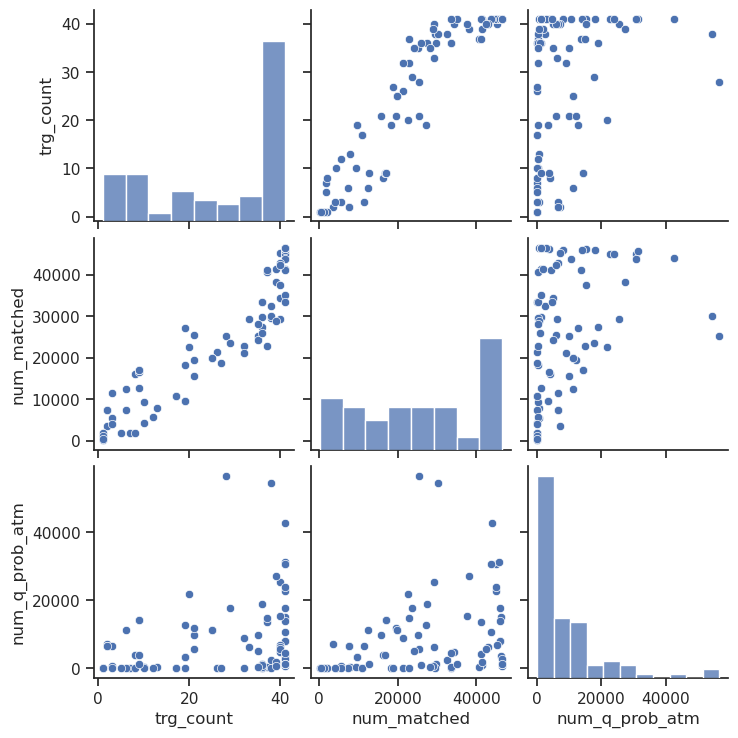

In [26]:
columns = ["trg_count", "num_matched", "num_q_prob_atm"]
_ = sns.pairplot(dfpg_tot[columns])

In [27]:
dfs = dfpg_tot[dfpg_tot.trg_count > max_trg_count/2]
print(dfs.isna().sum().sum())
data_to_plot = dfs[["avg_lddt"] + my_scores].copy()

6


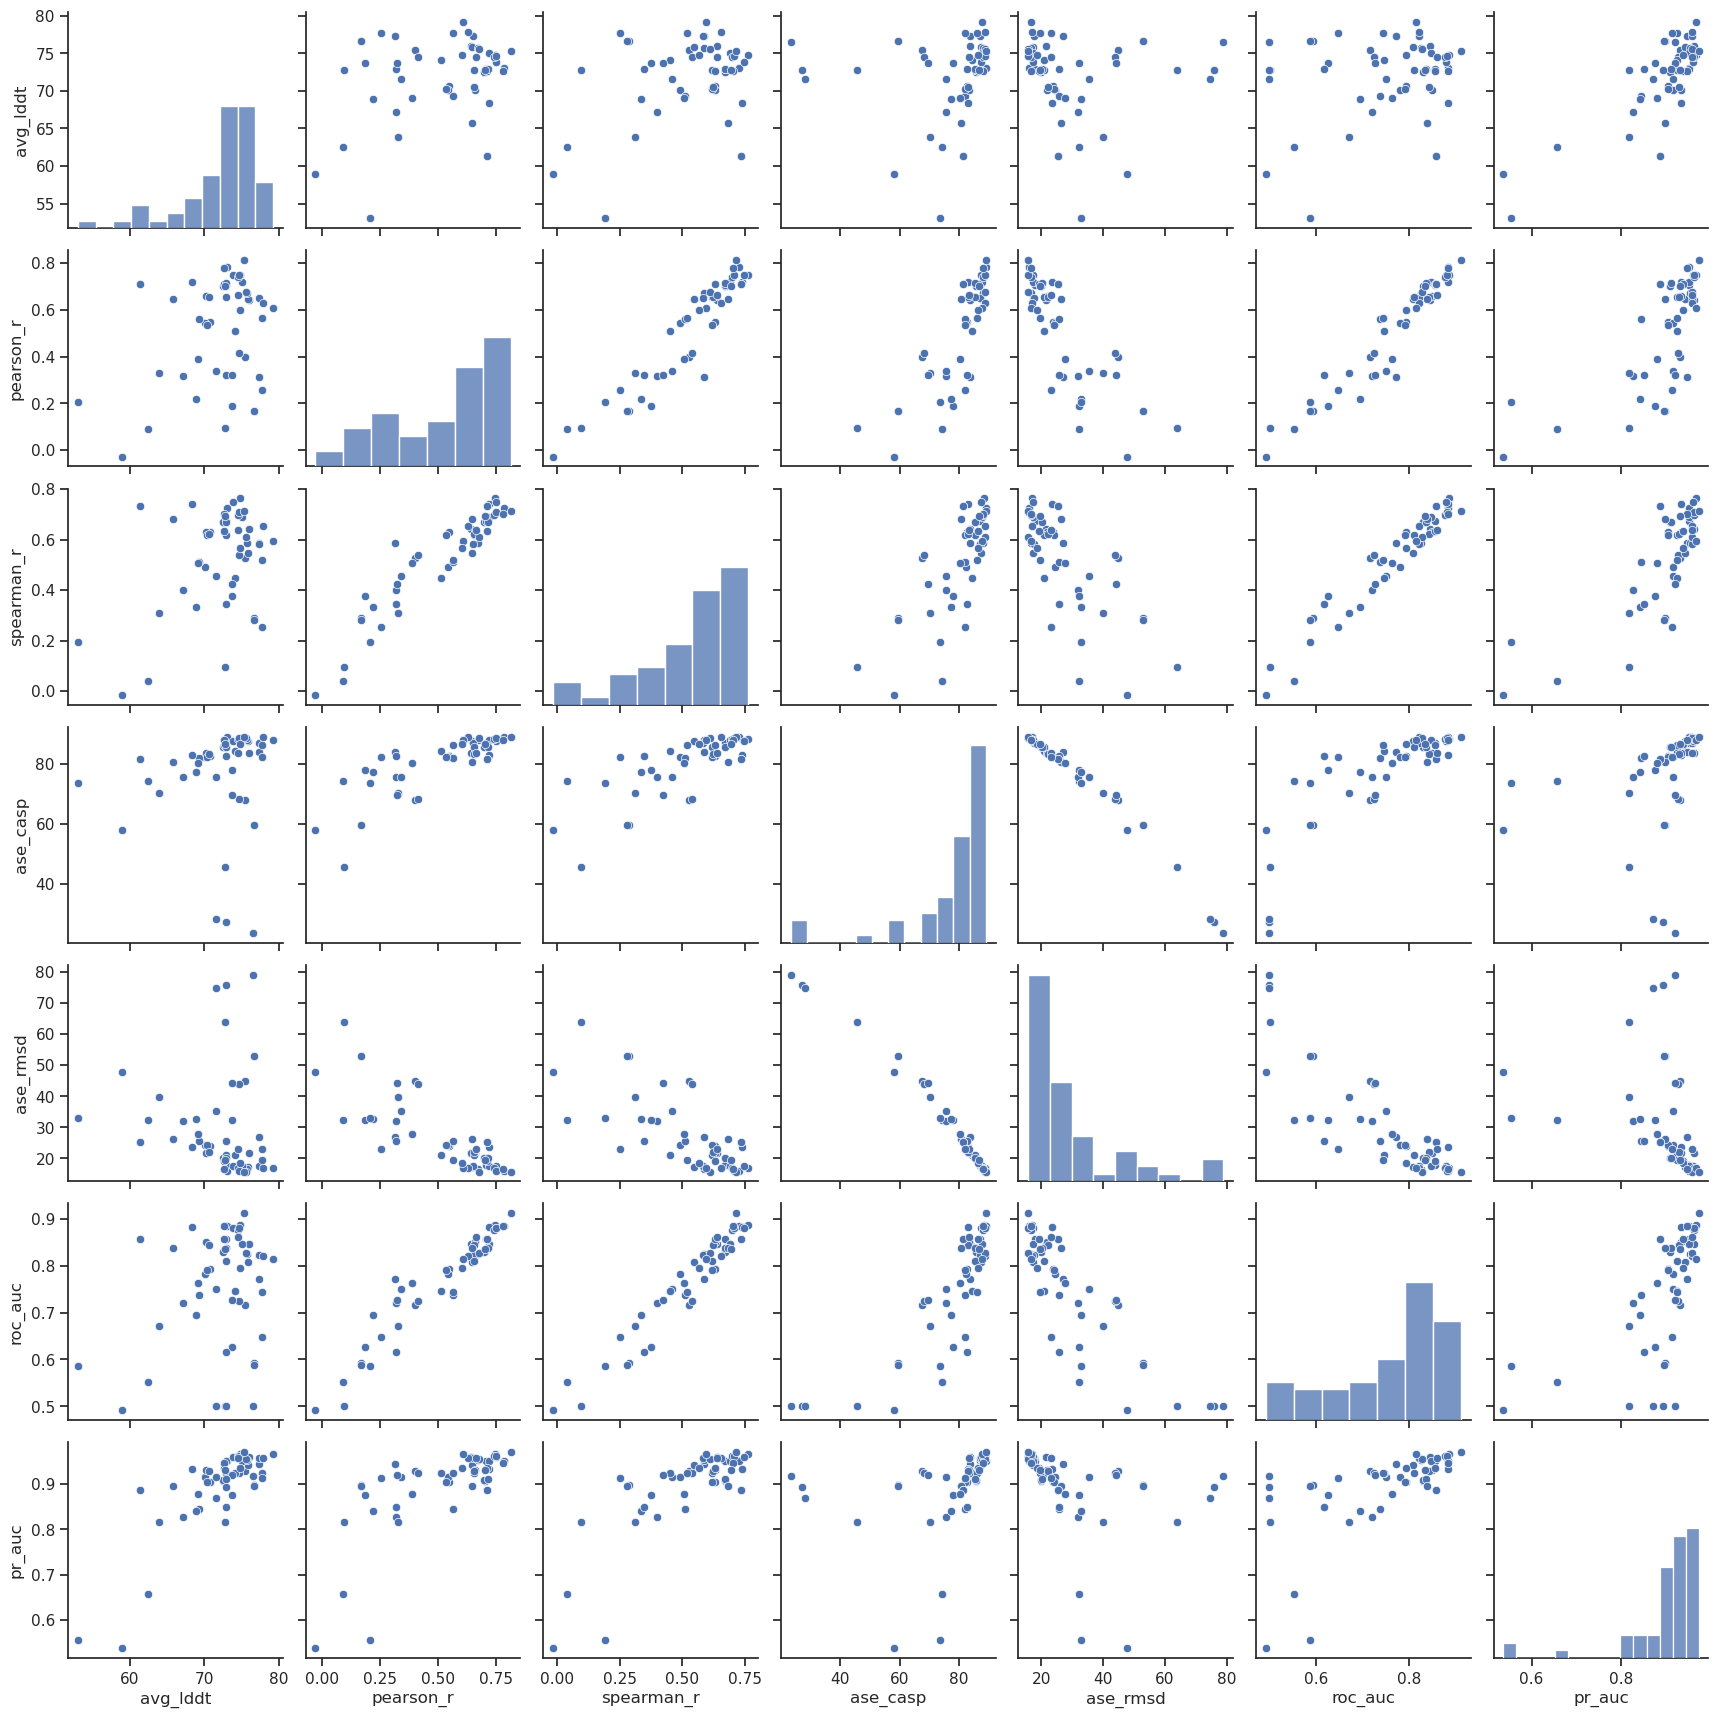

In [28]:
_ = sns.pairplot(data_to_plot)

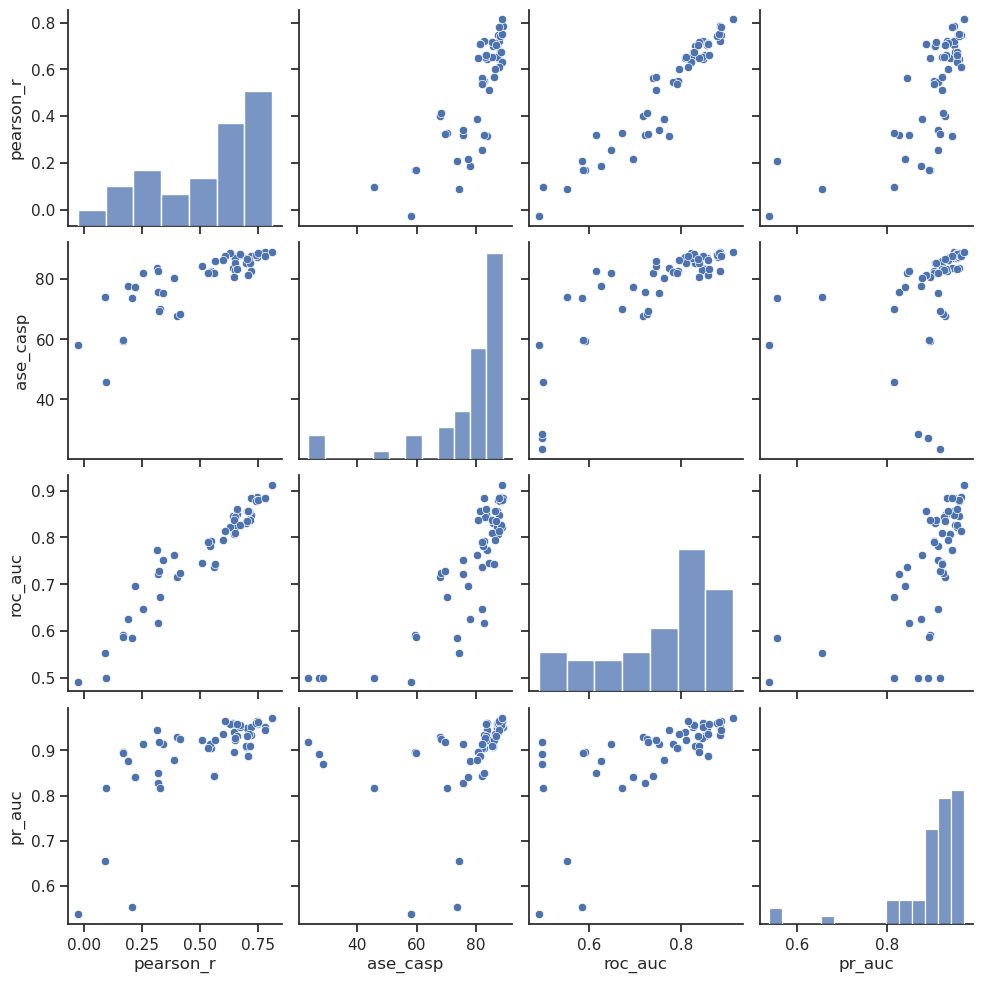

In [29]:
# reduce redundancy
sel_scores = ["pearson_r", "ase_casp", "roc_auc", "pr_auc"]
_ = sns.pairplot(data_to_plot[sel_scores])

In [30]:
# top ones for each category
top_indices = data_to_plot[["avg_lddt"] + sel_scores].idxmax().unique().tolist()
top_indices.append("390") # AF-vanilla
data_to_plot.loc[top_indices]

avg_lddt  pearson_r  spearman_r   ase_casp   ase_rmsd   roc_auc  \
group_id                                                                     
439       79.196483   0.609780    0.596447  87.677949  16.812587  0.814519   
446       75.322077   0.813222    0.714018  88.869350  15.773881  0.911621   
131       72.981847   0.784007    0.726468  88.933640  15.941070  0.883609   
390       74.690153   0.751345    0.708085  88.585422  15.850328  0.880765   

            pr_auc  
group_id            
439       0.965800  
446       0.971915  
131       0.951069  
390       0.962111

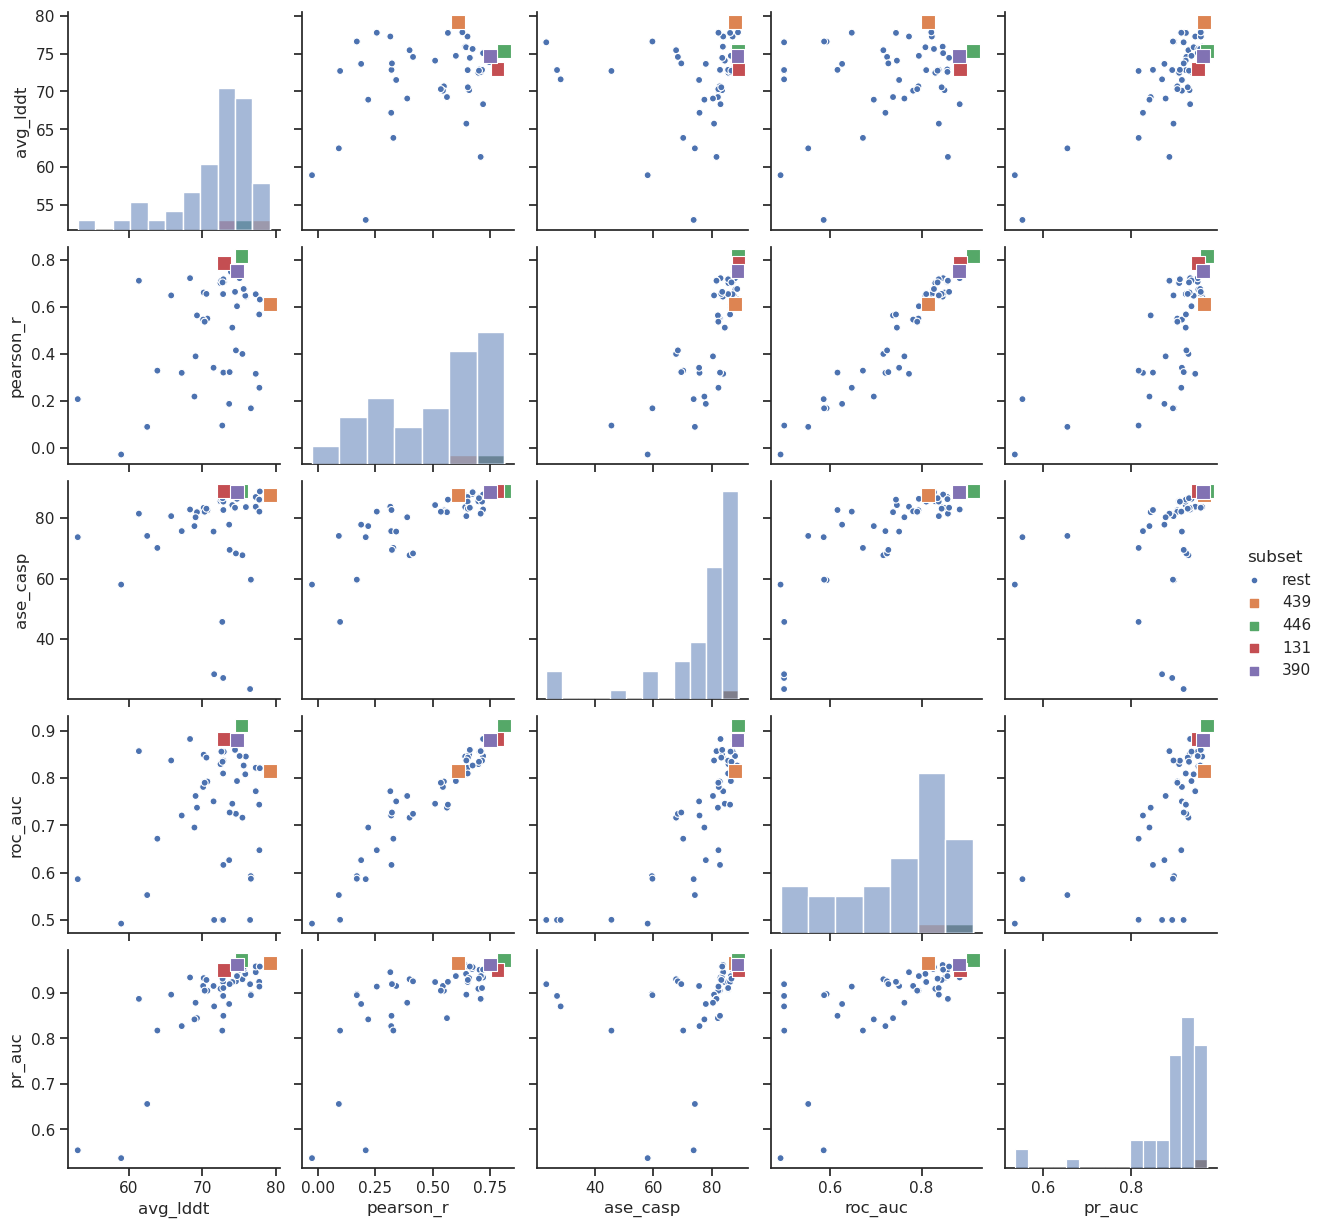

In [31]:
data_to_plot["subset"] = "rest"
for idx in top_indices:
    data_to_plot.loc[idx, "subset"] = idx
# rearrange data for nicer plot
subset_mask = data_to_plot.subset == "rest"
data_to_plot = pd.concat([data_to_plot[subset_mask],
                          data_to_plot.loc[top_indices]])
columns = ["avg_lddt"] + sel_scores + ["subset"]
markers = ["."] + [","] * len(top_indices)
_ = sns.pairplot(data_to_plot[columns],
                 hue="subset", markers=markers,
                 diag_kind="hist",
                 plot_kws=dict(s=100))

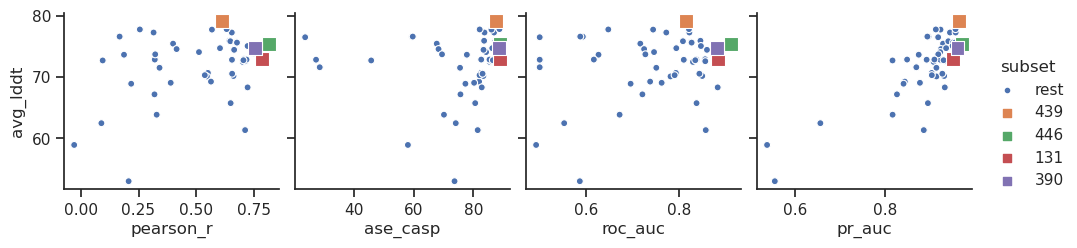

In [32]:
_ = sns.pairplot(data_to_plot[columns],
                 x_vars=sel_scores, y_vars=["avg_lddt"],
                 hue="subset", markers=markers,
                 diag_kind="hist",
                 plot_kws=dict(s=100))

## pairwise lDDT scatter plot for selected groups

In [33]:
# pick group to show pred. lDDT vs lDDT
def _scatter_group(group_id):
    sub_df1 = df1[df1.group_id == group_id]
    lddt_ref = np.concatenate(sub_df1.matched_lddts_ref.to_list())
    lddt_mdl = np.concatenate(sub_df1.matched_lddts_mdl.to_list())
    ax = sns.histplot(x=lddt_mdl, y=lddt_ref)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    plt.xlabel("pred. lDDT")
    plt.ylabel("actual lDDT")
    _ = sns.jointplot(x=lddt_mdl, y=lddt_ref, kind="kde", xlim=(0,100), ylim=(0,100))
    plt.xlabel("pred. lDDT")
    plt.ylabel("actual lDDT")

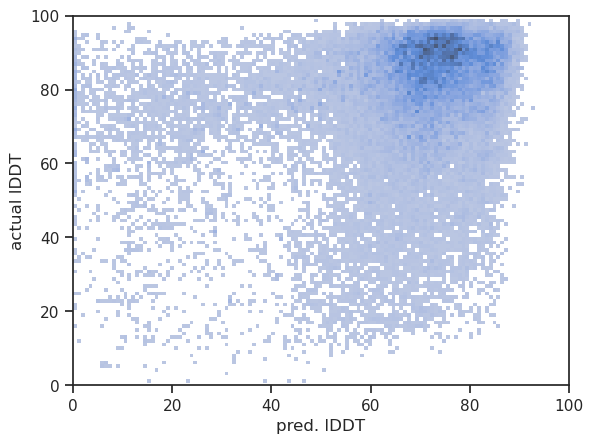

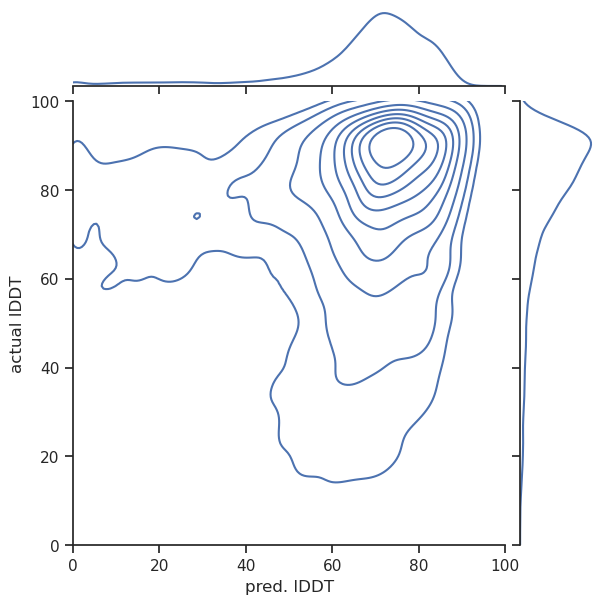

In [34]:
_scatter_group("494")

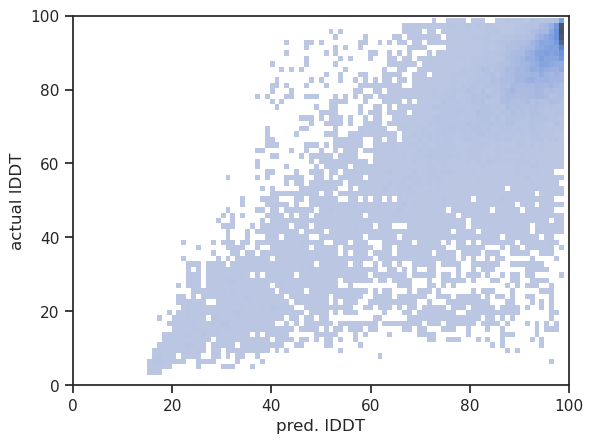

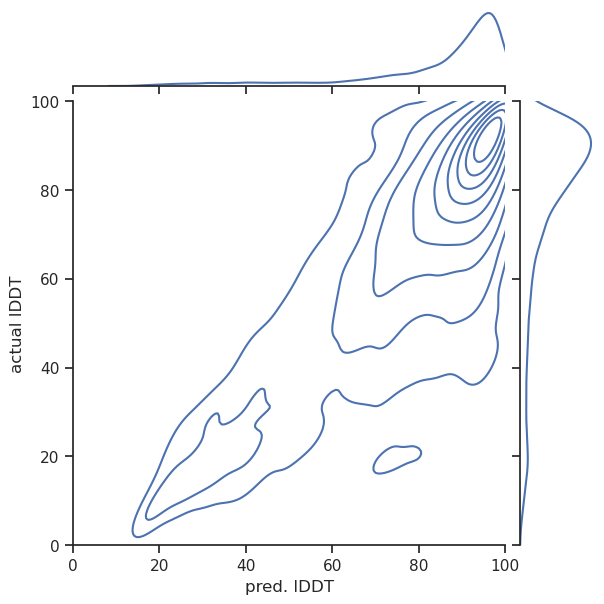

In [35]:
_scatter_group("446")

In [36]:
grp_names["446"]

'ColabFold'

## combined scores

In [37]:
def _prep_df(df, sel_scores, trg_count_cutoff=(max_trg_count * 0.8)):
    # keep only groups with enough targets
    df = df[df.trg_count > trg_count_cutoff].copy()
    # apply group names
    df = df.reset_index()
    df["group_name"] = df["group_id"].apply(lambda x: grp_names[x])
    df = df.set_index("group_name")
    # get combo score for all
    df["combo_score"] = df[sel_scores].sum(axis=1)
    # return sorted
    return df.sort_values("combo_score", ascending=False)

In [38]:
# combined score on per-target-averages?
dfpg["avg_ase_casp_01"] = dfpg["avg_ase_casp"] / 100
sel_scores = ["avg_pearson_r", "avg_ase_casp_01", "avg_roc_auc", "avg_pr_auc"]
dfs_pt = _prep_df(dfpg, sel_scores)
dfs_pt[["trg_count", "num_matched"] + sel_scores + ["combo_score"]].head(10)

trg_count  num_matched  avg_pearson_r  avg_ase_casp_01  \
group_name                                                                   
MUFold_H                   41        43857       0.711560         0.882428   
NBIS-AF2-multimer          41        35098       0.708313         0.875753   
ColabFold                  39        28953       0.681321         0.876392   
Takeda-Shitaka_Lab         41        45952       0.703767         0.877434   
colabfold_human            40        37518       0.681486         0.877118   
Kiharalab_Server           40        34374       0.711830         0.873468   
RaptorX-Multimer           40        29288       0.699337         0.866992   
Elofsson                   41        45066       0.694985         0.874048   
Grudinin                   37        41144       0.691977         0.874418   
BeijingAIProtein           40        42851       0.704807         0.861984   

                    avg_roc_auc  avg_pr_auc  combo_score  
group_name                                                
MUFold_H               0.908947    0.936086     3.439021  
NBIS-AF2-multimer      0.897820    0.941539     3.423425  
ColabFold              0.900361    0.957519     3.415593  
Takeda-Shitaka_Lab     0.895233    0.937802     3.414237  
colabfold_human        0.897966    0.951974     3.408544  
Kiharalab_Server       0.895926    0.925814     3.407038  
RaptorX-Multimer       0.902195    0.933827     3.402350  
Elofsson               0.892104    0.933703     3.394841  
Grudinin               0.890239    0.933102     3.389735  
BeijingAIProtein       0.900170    0.917896     3.384856

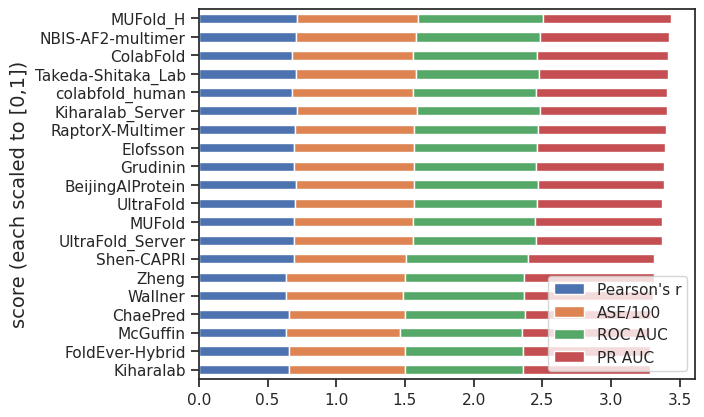

In [39]:
ax = dfs_pt.head(20)[sel_scores].plot(kind="barh", stacked=True)
ax.invert_yaxis()
ax.legend(loc='lower right', labels=["Pearson's r", "ASE/100", "ROC AUC", "PR AUC"])
_ = plt.ylabel("score (each scaled to [0,1])", fontsize=14)
plt.savefig("./plot_oligo_qe_top_20_pt.png", dpi=300, bbox_inches='tight')

In [40]:
# combined score on combined data
dfpg_tot["ase_casp_01"] = dfpg_tot["ase_casp"] / 100
sel_scores = ["pearson_r", "ase_casp_01", "roc_auc", "pr_auc"]
dfs = _prep_df(dfpg_tot, sel_scores)
dfs[["trg_count", "num_matched", "avg_lddt"] + sel_scores + ["combo_score"]].head(20)
# NOTE: had also tried "trg_count > max_trg_count/2" and
#       "num_matched > dfpg_tot.num_matched.max() * 0.8"
#       instead of "trg_count > max_trg_count * 0.8"

trg_count  num_matched   avg_lddt  pearson_r  ase_casp_01  \
group_name                                                                      
ColabFold                  39        28953  75.322077   0.813222     0.888693   
Kiharalab_Server           40        34374  72.981847   0.784007     0.889336   
colabfold_human            40        37518  72.676843   0.781057     0.878278   
RaptorX-Multimer           40        29288  74.793270   0.747331     0.882439   
NBIS-AF2-multimer          41        35098  74.690153   0.751345     0.885854   
Elofsson                   41        45066  73.885941   0.747975     0.874780   
MUFold_H                   41        43857  74.492872   0.741170     0.881393   
Takeda-Shitaka_Lab         41        45952  75.063053   0.720784     0.877602   
Grudinin                   37        41144  72.911486   0.705349     0.869383   
ChaePred                   35        24208  72.588223   0.711076     0.862255   
TRFold                     37        22776  68.322919   0.720782     0.828130   
BeijingAIProtein           40        42851  72.858468   0.716131     0.854171   
MultiFOLD                  41        33471  74.444570   0.662773     0.834018   
Yang-Multimer              38        32532  77.261020   0.652615     0.869362   
PEZYFoldings               38        29498  77.819252   0.630147     0.887680   
UltraFold                  41        46048  72.453019   0.701072     0.855241   
UltraFold_Server           41        46050  72.471720   0.700218     0.855217   
McGuffin                   41        43736  75.922165   0.642510     0.836121   
Yang                       39        41513  79.196483   0.609780     0.876779   
FoldEver-Hybrid            36        27368  70.553906   0.654099     0.830851   

                     roc_auc    pr_auc  combo_score  
group_name                                           
ColabFold           0.911621  0.971915     3.585452  
Kiharalab_Server    0.883609  0.951069     3.508021  
colabfold_human     0.884554  0.945704     3.489593  
RaptorX-Multimer    0.885777  0.965893     3.481441  
NBIS-AF2-multimer   0.880765  0.962111     3.480075  
Elofsson            0.879302  0.959321     3.461378  
MUFold_H            0.876956  0.961659     3.461178  
Takeda-Shitaka_Lab  0.847012  0.950876     3.396274  
Grudinin            0.856061  0.950544     3.381337  
ChaePred            0.856423  0.936731     3.366485  
TRFold              0.883078  0.933690     3.365679  
BeijingAIProtein    0.837276  0.910521     3.318098  
MultiFOLD           0.860027  0.957676     3.314494  
Yang-Multimer       0.822204  0.957927     3.302108  
PEZYFoldings        0.821252  0.957681     3.296760  
UltraFold           0.830408  0.907836     3.294556  
UltraFold_Server    0.829906  0.908920     3.294261  
McGuffin            0.845987  0.961061     3.285679  
Yang                0.814519  0.965800     3.266878  
FoldEver-Hybrid     0.843696  0.928243     3.256889

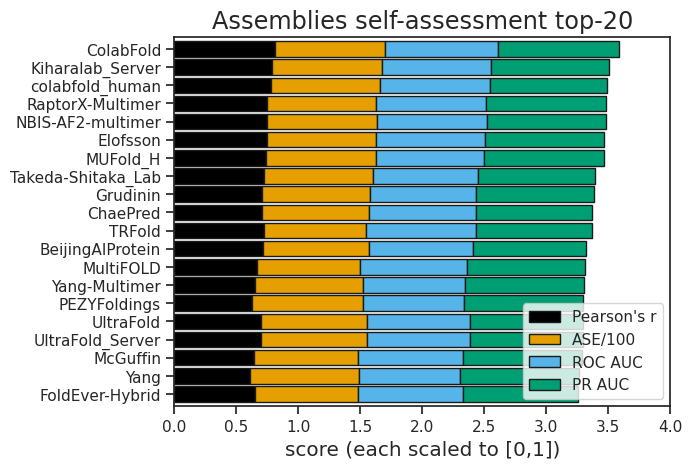

In [41]:
# from GS: stolen from http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
ax = dfs.head(20)[sel_scores].plot(kind="barh", stacked=True, width=0.85,
                                   linewidth=1.0, edgecolor='k', color=colors)
ax.invert_yaxis()
ax.set_xlim([0, 4])
ax.legend(loc='lower right', labels=["Pearson's r", "ASE/100", "ROC AUC", "PR AUC"])
plt.title("Assemblies self-assessment top-20", fontsize="x-large")
_ = plt.xlabel("score (each scaled to [0,1])", fontsize="large")
_ = plt.ylabel("", fontsize="large")
plt.savefig("./paper_plot_oligo_qe_top_20.png", dpi=300, bbox_inches='tight')

In [42]:
# ranges
top_dfs = dfs.head(20)
top_dfs.trg_count.min(), top_dfs.trg_count.max(), \
top_dfs.num_matched.min(), top_dfs.num_matched.max(), \
top_dfs.avg_lddt.min(), top_dfs.avg_lddt.max()
# NOTE: wide range of matched residues here due to stoichiometry...

(35, 41, 22776, 46050, 68.32291886195996, 79.19648302941246)

In [43]:
# check top lDDT groups
dfs[["trg_count", "num_matched", "avg_lddt"] + sel_scores + ["combo_score"]] \
    .sort_values("avg_lddt", ascending=False).head(20)

trg_count  num_matched   avg_lddt  pearson_r  ase_casp_01  \
group_name                                                                      
Yang                       39        41513  79.196483   0.609780     0.876779   
PEZYFoldings               38        29498  77.819252   0.630147     0.887680   
Venclovas                  41        46457  77.762116   0.255689     0.821155   
Zheng                      41        46456  77.738789   0.566871     0.860756   
Wallner                    35        25270  77.262964   0.314996     0.837342   
Yang-Multimer              38        32532  77.261020   0.652615     0.869362   
MULTICOM                   41        46560  76.603213   0.168334     0.596395   
MULTICOM_human             41        46562  76.585540   0.168518     0.594567   
ClusPro                    36        33487  76.494514        NaN     0.235055   
McGuffin                   41        43736  75.922165   0.642510     0.836121   
MULTICOM_qa                41        41380  75.451643   0.399170     0.676987   
ColabFold                  39        28953  75.322077   0.813222     0.888693   
Takeda-Shitaka_Lab         41        45952  75.063053   0.720784     0.877602   
RaptorX-Multimer           40        29288  74.793270   0.747331     0.882439   
CoDock                     40        42375  74.712012   0.601645     0.863406   
NBIS-AF2-multimer          41        35098  74.690153   0.751345     0.885854   
MULTICOM_deep              41        41158  74.565577   0.414290     0.682998   
MUFold_H                   41        43857  74.492872   0.741170     0.881393   
MultiFOLD                  41        33471  74.444570   0.662773     0.834018   
BAKER                      41        46549  74.075800   0.510932     0.842725   

                     roc_auc    pr_auc  combo_score  
group_name                                           
Yang                0.814519  0.965800     3.266878  
PEZYFoldings        0.821252  0.957681     3.296760  
Venclovas           0.647649  0.913690     2.638184  
Zheng               0.744127  0.924149     3.095903  
Wallner             0.772489  0.945260     2.870087  
Yang-Multimer       0.822204  0.957927     3.302108  
MULTICOM            0.587304  0.894809     2.246842  
MULTICOM_human      0.592802  0.897304     2.253191  
ClusPro             0.500000  0.918909     1.653964  
McGuffin            0.845987  0.961061     3.285679  
MULTICOM_qa         0.716595  0.929819     2.722571  
ColabFold           0.911621  0.971915     3.585452  
Takeda-Shitaka_Lab  0.847012  0.950876     3.396274  
RaptorX-Multimer    0.885777  0.965893     3.481441  
CoDock              0.794029  0.936700     3.195780  
NBIS-AF2-multimer   0.880765  0.962111     3.480075  
MULTICOM_deep       0.724741  0.925227     2.747256  
MUFold_H            0.876956  0.961659     3.461178  
MultiFOLD           0.860027  0.957676     3.314494  
BAKER               0.746117  0.923657     3.023431

In [44]:
# what about z-scores?
zscores = dfs[sel_scores].dropna().apply(zscore)
zscores["combo_zscore"] = zscores[sel_scores].sum(axis=1)
zscores["combo_rank"] = zscores["combo_zscore"].rank(ascending=False, method="min").astype(int)
zscores[["combo_rank", "combo_zscore"] + sel_scores].head(20)

combo_rank  combo_zscore  pearson_r  ase_casp_01  \
group_name                                                             
ColabFold                    1      4.397376   1.319045     0.882172   
Kiharalab_Server             2      3.748458   1.188138     0.888927   
colabfold_human              5      3.559774   1.174920     0.772733   
RaptorX-Multimer             3      3.719847   1.023806     0.816456   
NBIS-AF2-multimer            4      3.679155   1.041790     0.852339   
Elofsson                     7      3.498709   1.026690     0.735982   
MUFold_H                     6      3.545552   0.996201     0.805459   
Takeda-Shitaka_Lab           8      2.999302   0.904854     0.765629   
Grudinin                     9      2.923672   0.835697     0.679275   
ChaePred                    10      2.702589   0.861359     0.604379   
TRFold                      11      2.596662   0.904846     0.245814   
BeijingAIProtein            17      2.129867   0.884006     0.519435   
MultiFOLD                   13      2.488647   0.644925     0.307684   
Yang-Multimer               14      2.466151   0.599412     0.679050   
PEZYFoldings                12      2.545985   0.498739     0.871520   
UltraFold                   19      1.975746   0.816533     0.530675   
UltraFold_Server            18      1.980761   0.812705     0.530429   
McGuffin                    16      2.332398   0.554134     0.329776   
Yang                        15      2.380603   0.407480     0.756988   
FoldEver-Hybrid             20      1.891369   0.606062     0.274401   

                     roc_auc    pr_auc  
group_name                              
ColabFold           1.322914  0.873245  
Kiharalab_Server    1.062578  0.608816  
colabfold_human     1.071358  0.540763  
RaptorX-Multimer    1.082725  0.796859  
NBIS-AF2-multimer   1.036144  0.748882  
Elofsson            1.022545  0.713491  
MUFold_H            1.000744  0.743147  
Takeda-Shitaka_Lab  0.722452  0.606367  
Grudinin            0.806549  0.602151  
ChaePred            0.809910  0.426941  
TRFold              1.057642  0.388360  
BeijingAIProtein    0.631961  0.094466  
MultiFOLD           0.843409  0.692629  
Yang-Multimer       0.491887  0.695803  
PEZYFoldings        0.483039  0.692687  
UltraFold           0.568130  0.060408  
UltraFold_Server    0.563467  0.074161  
McGuffin            0.712924  0.735563  
Yang                0.420459  0.795675  
FoldEver-Hybrid     0.691630  0.319276

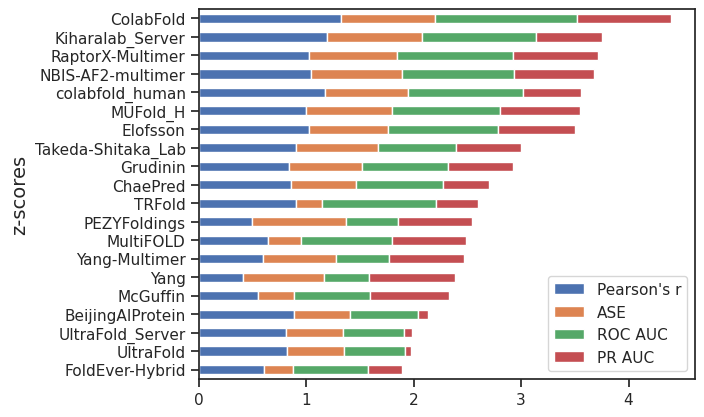

In [45]:
zscores_ranked = zscores.sort_values("combo_zscore", ascending=False)
ax = zscores_ranked.head(20)[sel_scores].plot(kind="barh", stacked=True)
ax.invert_yaxis()
ax.legend(loc='lower right', labels=["Pearson's r", "ASE", "ROC AUC", "PR AUC"])
_ = plt.ylabel("z-scores", fontsize=14)
plt.savefig("./plot_oligo_qe_top_20_z.png", dpi=300, bbox_inches='tight')

avg_lddt  pearson_r  ase_casp_01   roc_auc    pr_auc  \
group_name                                                                 
Yang               79.196483   0.609780     0.876779  0.814519  0.965800   
ColabFold          75.322077   0.813222     0.888693  0.911621  0.971915   
Kiharalab_Server   72.981847   0.784007     0.889336  0.883609  0.951069   
NBIS-AF2-multimer  74.690153   0.751345     0.885854  0.880765  0.962111   

                   combo_score  
group_name                      
Yang                  3.266878  
ColabFold             3.585452  
Kiharalab_Server      3.508021  
NBIS-AF2-multimer     3.480075

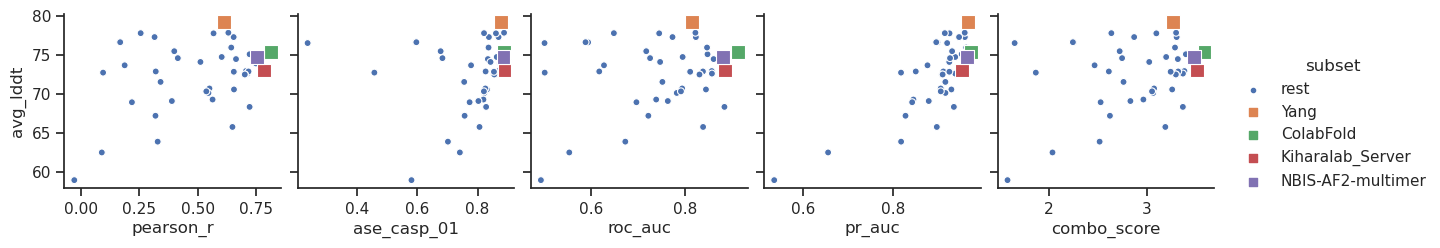

In [46]:
# plot lDDT vs selected scores and mark top groups (i.e. max on one of scores)
sel_scores = ["pearson_r", "ase_casp_01", "roc_auc", "pr_auc", "combo_score"]
# mark selected ones
data_to_plot = dfs[["avg_lddt"] + sel_scores].copy()
top_indices = data_to_plot.idxmax().unique().tolist()
top_indices.append(grp_names["390"]) # AF-vanilla
display(data_to_plot.loc[top_indices])
data_to_plot["subset"] = "rest"
for idx in top_indices:
    data_to_plot.loc[idx, "subset"] = idx
# rearrange data for nicer plot
subset_mask = data_to_plot.subset == "rest"
data_to_plot = pd.concat([data_to_plot[subset_mask],
                          data_to_plot.loc[top_indices]])
columns = ["avg_lddt"] + sel_scores + ["subset"]
markers = ["."] + [","] * len(top_indices)
_ = sns.pairplot(data_to_plot[columns],
                 x_vars=sel_scores, y_vars=["avg_lddt"],
                 hue="subset", markers=markers,
                 diag_kind="hist",
                 plot_kws=dict(s=100))
plt.savefig("./plot_oligo_lddt_vs_scores.png", dpi=300, bbox_inches='tight')

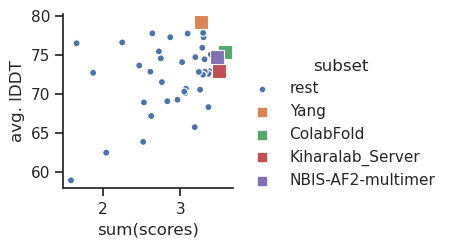

In [47]:
_ = sns.pairplot(data_to_plot[columns],
                 x_vars=["combo_score"], y_vars=["avg_lddt"],
                 hue="subset", markers=markers,
                 diag_kind="hist",
                 plot_kws=dict(s=100))
_ = plt.xlabel("sum(scores)")
_ = plt.ylabel("avg. lDDT")
plt.savefig("./plot_oligo_lddt_vs_sum_scores.png", dpi=300, bbox_inches='tight')

In [48]:
# keep data for Fig. in manuscript
sel_cols = ["group_id", "trg_count", "pearson_r", "ase_casp_01", "roc_auc", "pr_auc", "combo_score", "avg_lddt"]
dfs[sel_cols].to_csv("./Fig6C_oligo_scores.csv")

In [49]:
# wall of shame
rev_grp_names = {v:k for k, v in grp_names.items()}
print("AL", data_to_plot.avg_lddt.quantile([0.25, 0.5, 0.75]).tolist(),
      data_to_plot.avg_lddt.loc[grp_names["390"]])
print("CS", data_to_plot.combo_score.quantile([0.25, 0.5, 0.75]).tolist())
al_quan = 75 #data_to_plot.avg_lddt.quantile(0.8)
cs_quan = 3  #data_to_plot.combo_score.quantile(0.4)
tst = data_to_plot[(data_to_plot.avg_lddt > al_quan) & \
                   (data_to_plot.combo_score < cs_quan)].sort_values("combo_score").copy()
tst["group_id"] = pd.Series(tst.index, index=tst.index).apply(lambda x: rev_grp_names[x])
tst

AL [70.58600671053819, 72.94666661555954, 75.2573210573249] 74.69015328508748
CS [2.6592803849451636, 3.1416486118388223, 3.317197028275422]


avg_lddt  pearson_r  ase_casp_01   roc_auc    pr_auc  \
group_name                                                              
ClusPro         76.494514        NaN     0.235055  0.500000  0.918909   
MULTICOM        76.603213   0.168334     0.596395  0.587304  0.894809   
MULTICOM_human  76.585540   0.168518     0.594567  0.592802  0.897304   
Venclovas       77.762116   0.255689     0.821155  0.647649  0.913690   
MULTICOM_qa     75.451643   0.399170     0.676987  0.716595  0.929819   
Wallner         77.262964   0.314996     0.837342  0.772489  0.945260   

                combo_score subset group_id  
group_name                                   
ClusPro            1.653964   rest      350  
MULTICOM           2.246842   rest      367  
MULTICOM_human     2.253191   rest      003  
Venclovas          2.638184   rest      494  
MULTICOM_qa        2.722571   rest      086  
Wallner            2.870087   rest      037

In [50]:
# check manually
# df1[df1.group_id == "003"]
# df1[(df1.group_id == "003") & (df1.pearson_r < 0.1)]
df1[df1.group_id == "086"][["trg_name", "stereocheck_atoms_removed_mdl",
                            "lddt_mdl_max", "pearson_r", "avg_lddt"]] \
   .sort_values("pearson_r").head(20)

trg_name  stereocheck_atoms_removed_mdl  lddt_mdl_max  pearson_r  \
1771     H1137                           56.0          4.99  -0.021926   
9578    T1176o                          114.0          4.99  -0.017958   
1468     H1135                            0.0          4.99  -0.004625   
6554    T1115o                            8.0          4.99   0.011379   
328      H1111                          592.0          4.99   0.026826   
10945   T1192o                          320.0          4.99   0.037225   
8236    T1160o                            0.0         98.59   0.391727   
7768    T1132o                            0.0         98.97   0.447648   
5847    T1109o                            0.0         98.98   0.476039   
5593     H1185                            0.0         98.78   0.491821   
6746    T1121o                            0.0         98.71   0.588229   
4734     H1168                            0.0         98.89   0.594271   
9830    T1178o                            0.0         98.87   0.613556   
7495    T1127o                            0.0         98.97   0.621818   
8001    T1153o                            0.0         98.98   0.642450   
8497    T1161o                            0.0         98.76   0.652444   
4431     H1167                            0.0         98.87   0.653935   
2902     H1143                            0.0         98.97   0.657152   
4140     H1166                            0.0         98.81   0.680426   
6331    T1113o                            0.0         98.46   0.683968   

        avg_lddt  
1771   75.874865  
9578   48.235159  
1468   81.191982  
6554   59.183321  
328    69.920454  
10945  82.603955  
8236   45.403448  
7768   90.647368  
5847   80.265837  
5593   78.565302  
6746   77.430176  
4734   90.331206  
9830   75.463315  
7495   84.831873  
8001   85.560681  
8497   46.262500  
4431   85.472963  
2902   87.687538  
4140   82.512116  
6331   87.088095

**Observations**: 350 didn't try (all b-factors 0), 003 & 367 have some targets (e.g. H1111) with b-factors between 0 and 5, 494 & 037 have nothing obvious (just poor perf.)

## check single target for top groups

In [51]:
[(x, rev_grp_names[x]) for x in top_indices]

[('Yang', '439'),
 ('ColabFold', '446'),
 ('Kiharalab_Server', '131'),
 ('NBIS-AF2-multimer', '390')]

In [52]:
# possibly tricky target?
top_group_ids = [rev_grp_names[x] for x in top_indices]
df1[(df1.trg_name == "T1170o") & df1.group_id.isin(top_group_ids)]\
    [['group_id', 'pearson_r', 'ase_casp', 'roc_auc', 'pr_auc']]

group_id  pearson_r   ase_casp   roc_auc    pr_auc
8784      131   0.655903  91.648578  0.898837  0.993313
8918      390   0.607219  90.337968  0.854966  0.985903
8938      439   0.639083  89.137684  0.882499  0.993646
8948      446   0.706173  91.641059  0.922279  0.997223

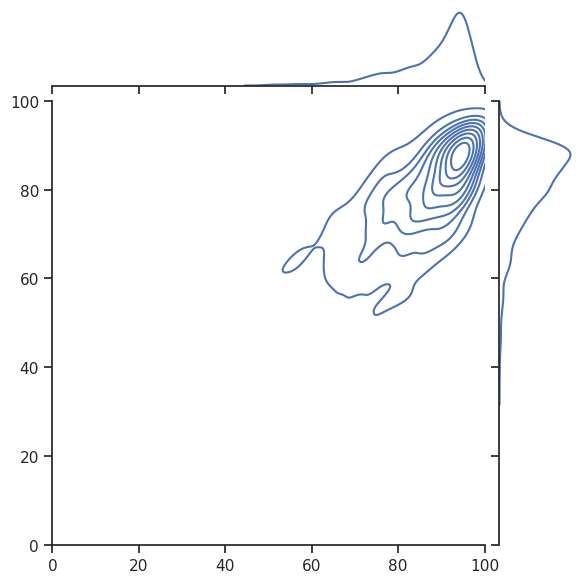

In [53]:
 _ = sns.jointplot(x=df1.loc[8948, "matched_lddts_mdl"],
                   y=df1.loc[8948, "matched_lddts_ref"],
                   kind="kde", xlim=(0,100), ylim=(0,100))

## check scores split into residue classes

In [54]:
dfs_tst = dfs.copy()
sel_scores = ["pearson_r", "ase_casp_01", "roc_auc", "pr_auc"]
# add plenty of extra columns (1 per score per mdl/ref per res-class)
class_names = ["core", "surface", "interface"]
sel_scores_mdl_per_type = [
    [f"{v}_mdl_{cn}" for v in sel_scores] \
    for cn in class_names
]
sel_scores_ref_per_type = [
    [f"{v}_ref_{cn}" for v in sel_scores] \
    for cn in class_names
]
ratio_mdl_col_per_type = [f"ratio_mdl_{cn}" for cn in class_names]
ratio_ref_col_per_type = [f"ratio_ref_{cn}" for cn in class_names]
combo_score_mdl_per_type = [f"combo_score_mdl_{cn}" for cn in class_names]
combo_score_ref_per_type = [f"combo_score_ref_{cn}" for cn in class_names]
all_extra_cols = sum(sel_scores_mdl_per_type + sel_scores_ref_per_type, []) \
               + ratio_mdl_col_per_type + ratio_ref_col_per_type \
               + combo_score_mdl_per_type + combo_score_ref_per_type
for v in all_extra_cols:
    dfs_tst[v] = None

# helper to get all scores
def _get_class_scores(lddt_ref, lddt_mdl, indices):
    lddt_ref_sub = lddt_ref[indices]
    lddt_mdl_sub = lddt_mdl[indices]
    scores = _calc_scores(lddt_ref_sub, lddt_mdl_sub)
    consensus_scores = [
        scores["pearson_r"],
        scores["ase_casp"] / 100,
        scores["roc_auc"],
        scores["pr_auc"]
    ]
    return consensus_scores, len(lddt_ref_sub) / len(lddt_ref)

# apply to all groups
for idx, row in dfs.iterrows():
    sub_df1 = df1[df1.group_id == row.group_id]
    # group everything together
    lddt_ref = np.concatenate(sub_df1.matched_lddts_ref.to_list())
    lddt_mdl = np.concatenate(sub_df1.matched_lddts_mdl.to_list())
    class_ref = np.concatenate(sub_df1.matched_ref_class.to_list())
    class_mdl = np.concatenate(sub_df1.matched_mdl_class.to_list())
    # go through classes
    for class_type in range(len(class_names)):
        class_name = class_names[class_type]
        # filter on model
        consensus_scores, ratio = _get_class_scores(lddt_ref, lddt_mdl,
                                                    class_mdl == class_type)
        dfs_tst.loc[idx, ratio_mdl_col_per_type[class_type]] = ratio
        dfs_tst.loc[idx, sel_scores_mdl_per_type[class_type]] = consensus_scores
        if all(s is not None for s in consensus_scores):
            dfs_tst.loc[idx, combo_score_mdl_per_type[class_type]] = sum(consensus_scores)
        # filter on ref
        consensus_scores, ratio = _get_class_scores(lddt_ref, lddt_mdl,
                                                    class_ref == class_type)
        dfs_tst.loc[idx, ratio_ref_col_per_type[class_type]] = ratio
        dfs_tst.loc[idx, sel_scores_ref_per_type[class_type]] = consensus_scores
        if all(s is not None for s in consensus_scores):
            dfs_tst.loc[idx, combo_score_ref_per_type[class_type]] = sum(consensus_scores)

In [55]:
dfs_tst[["combo_score"] + combo_score_mdl_per_type + combo_score_ref_per_type].head(20)

combo_score combo_score_mdl_core combo_score_mdl_surface  \
group_name                                                                     
ColabFold              3.585452             3.608036                3.586302   
Kiharalab_Server       3.508021             3.524555                3.559924   
colabfold_human        3.489593             3.476761                3.504797   
RaptorX-Multimer       3.481441             3.497221                3.463085   
NBIS-AF2-multimer      3.480075             3.464467                3.522053   
Elofsson               3.461378             3.444802                3.516139   
MUFold_H               3.461178             3.392312                3.481793   
Takeda-Shitaka_Lab     3.396274             3.236424                3.462181   
Grudinin               3.381337             3.290575                3.398796   
ChaePred               3.366485             3.470005                 3.47114   
TRFold                 3.365679             3.453202                3.322932   
BeijingAIProtein       3.318098             3.342828                3.217179   
MultiFOLD              3.314494             3.335371                3.303047   
Yang-Multimer          3.302108             3.209587                3.343573   
PEZYFoldings           3.296760             3.361673                3.276909   
UltraFold              3.294556             3.327409                3.216932   
UltraFold_Server       3.294261             3.327528                3.215939   
McGuffin               3.285679             3.249726                3.310936   
Yang                   3.266878             3.176627                3.276841   
FoldEver-Hybrid        3.256889             3.377178                3.191322   

                   combo_score_mdl_interface combo_score_ref_core  \
group_name                                                          
ColabFold                           3.353548             3.717159   
Kiharalab_Server                    3.184854             3.640302   
colabfold_human                      3.29674             3.618151   
RaptorX-Multimer                    3.323133             3.601236   
NBIS-AF2-multimer                   3.250946             3.621381   
Elofsson                             3.14896             3.549019   
MUFold_H                            3.222206             3.531356   
Takeda-Shitaka_Lab                  3.238476             3.466171   
Grudinin                            3.192456             3.487049   
ChaePred                            2.876879             3.626561   
TRFold                              3.103226             3.486702   
BeijingAIProtein                    3.156525             3.456661   
MultiFOLD                           3.160444             3.482515   
Yang-Multimer                       3.124358              3.36223   
PEZYFoldings                        3.114599             3.486039   
UltraFold                           3.074984             3.446466   
UltraFold_Server                    3.075023              3.44722   
McGuffin                             3.08392             3.360978   
Yang                                3.094389             3.359691   
FoldEver-Hybrid                     2.933189              3.46342   

                   combo_score_ref_surface combo_score_ref_interface  
group_name                                                            
ColabFold                          3.53895                  3.389893  
Kiharalab_Server                  3.507153                   3.18178  
colabfold_human                   3.401993                  3.285442  
RaptorX-Multimer                   3.44463                  3.212341  
NBIS-AF2-multimer                 3.443547                  3.183852  
Elofsson                          3.372575                  3.232784  
MUFold_H                          3.355206                  3.230051  
Takeda-Shitaka_Lab                3.317146                  3.228253  
Grudinin                      

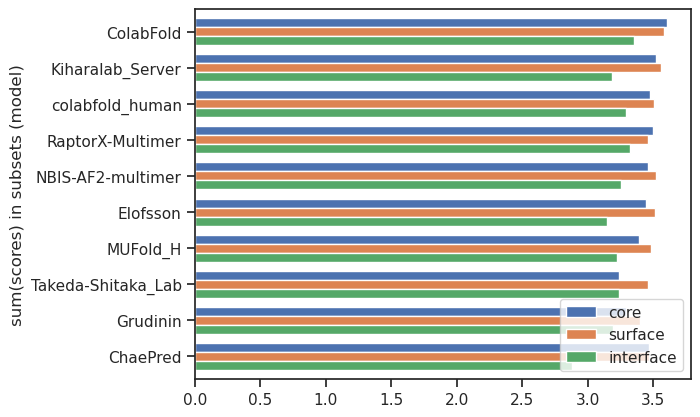

In [56]:
ax = dfs_tst.head(10)[combo_score_mdl_per_type].plot(kind="barh", stacked=False, width=0.75)
ax.invert_yaxis()
ax.legend(loc='lower right', labels=class_names)
_ = plt.ylabel("sum(scores) in subsets (model)")
plt.savefig(f"./plot_oligo_qe_top_10_per_mdl_class.png", dpi=300, bbox_inches='tight')

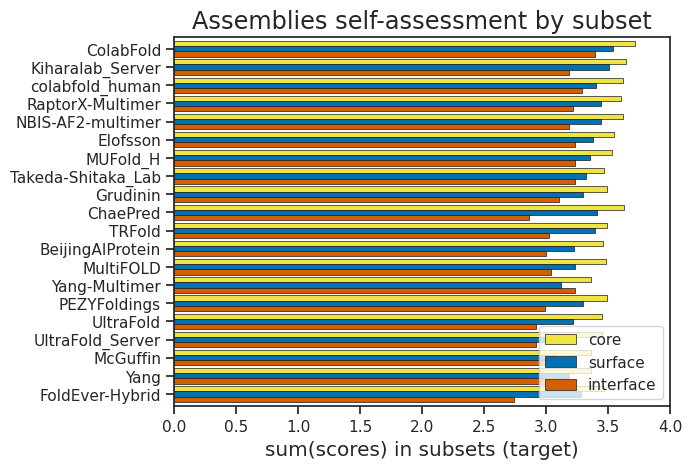

In [57]:
# from GS: stolen from http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
ax = dfs_tst.head(20)[combo_score_ref_per_type].plot(kind="barh", stacked=False, width=0.85,
                                                     linewidth=0.5, edgecolor='k', color=colors[4:])
ax.invert_yaxis()
ax.set_xlim([0, 4])
ax.legend(loc='lower right', labels=class_names)
plt.title("Assemblies self-assessment by subset", fontsize="x-large")
_ = plt.xlabel("sum(scores) in subsets (target)", fontsize="large")
_ = plt.ylabel("", fontsize="large")
plt.savefig(f"./paper_plot_oligo_qe_top_20_per_ref_class.png", dpi=300, bbox_inches='tight')

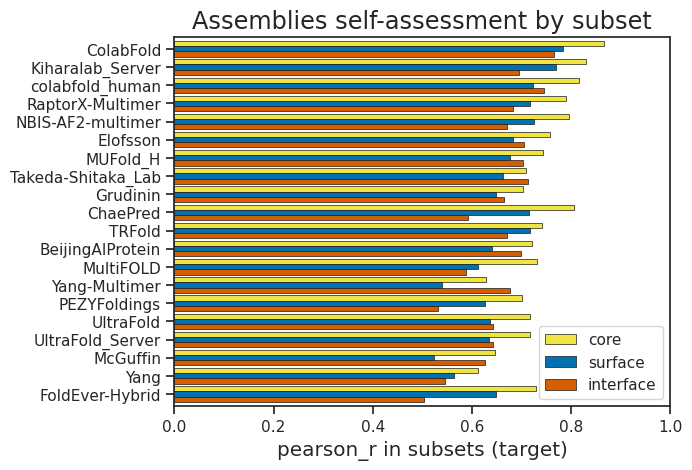

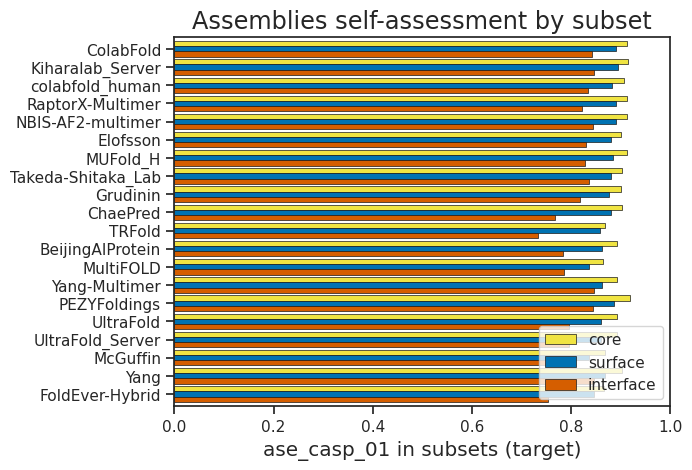

In [58]:
# extra for Andriy
sel_cols = ['group_id', 'trg_count'] \
         + sorted(c for c in dfs_tst.columns if "_ref_" in c and "lddt" not in c and "ratio" not in c)
dfs_tst[sel_cols].to_csv("./Fig6D_oligo_split_scores.csv")
for score in ["pearson_r", "ase_casp_01"]:
    sel_cols = [f"{score}_ref_{cn}" for cn in class_names]
    colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    ax = dfs_tst.head(20)[sel_cols].plot(kind="barh", stacked=False, width=0.85,
                                         linewidth=0.5, edgecolor='k', color=colors[4:])
    ax.invert_yaxis()
    ax.set_xlim([0, 1])
    ax.legend(loc='lower right', labels=class_names)
    plt.title("Assemblies self-assessment by subset", fontsize="x-large")
    _ = plt.xlabel(f"{score} in subsets (target)", fontsize="large")
    _ = plt.ylabel("", fontsize="large")
    plt.savefig(f"./Andriy_plot_oligo_qe_top_20_per_ref_class_{score}.png", dpi=300, bbox_inches='tight')

In [59]:
dfs_tst[combo_score_mdl_per_type].sort_values("combo_score_mdl_interface", ascending=False).head(5)

combo_score_mdl_core combo_score_mdl_surface  \
group_name                                                        
ColabFold                      3.608036                3.586302   
RaptorX-Multimer               3.497221                3.463085   
colabfold_human                3.476761                3.504797   
NBIS-AF2-multimer              3.464467                3.522053   
Takeda-Shitaka_Lab             3.236424                3.462181   

                   combo_score_mdl_interface  
group_name                                    
ColabFold                           3.353548  
RaptorX-Multimer                    3.323133  
colabfold_human                      3.29674  
NBIS-AF2-multimer                   3.250946  
Takeda-Shitaka_Lab                  3.238476

In [60]:
dfs_tst[combo_score_ref_per_type].sort_values("combo_score_ref_interface", ascending=False).head(5)

combo_score_ref_core combo_score_ref_surface  \
group_name                                                     
ColabFold                   3.717159                 3.53895   
colabfold_human             3.618151                3.401993   
Elofsson                    3.549019                3.372575   
Yang-Multimer                3.36223                3.117744   
MUFold_H                    3.531356                3.355206   

                combo_score_ref_interface  
group_name                                 
ColabFold                        3.389893  
colabfold_human                  3.285442  
Elofsson                         3.232784  
Yang-Multimer                    3.230447  
MUFold_H                         3.230051

In [61]:
dfs_tst[["combo_score"] + sel_scores_mdl_per_type[2]].head(20)

combo_score pearson_r_mdl_interface  \
group_name                                                
ColabFold              3.585452                0.701737   
Kiharalab_Server       3.508021                0.652991   
colabfold_human        3.489593                0.701017   
RaptorX-Multimer       3.481441                 0.70882   
NBIS-AF2-multimer      3.480075                0.652092   
Elofsson               3.461378                0.604476   
MUFold_H               3.461178                0.634275   
Takeda-Shitaka_Lab     3.396274                0.638639   
Grudinin               3.381337                0.637978   
ChaePred               3.366485                 0.57185   
TRFold                 3.365679                0.655734   
BeijingAIProtein       3.318098                0.650494   
MultiFOLD              3.314494                0.593155   
Yang-Multimer          3.302108                0.566475   
PEZYFoldings           3.296760                0.572943   
UltraFold              3.294556                0.598613   
UltraFold_Server       3.294261                0.597914   
McGuffin               3.285679                0.552862   
Yang                   3.266878                0.555748   
FoldEver-Hybrid        3.256889                0.550243   

                   ase_casp_01_mdl_interface roc_auc_mdl_interface  \
group_name                                                           
ColabFold                           0.882648              0.827526   
Kiharalab_Server                    0.866563              0.805733   
colabfold_human                     0.858899              0.840958   
RaptorX-Multimer                     0.86713              0.830773   
NBIS-AF2-multimer                   0.873696              0.811212   
Elofsson                            0.858342              0.786659   
MUFold_H                            0.862523              0.810555   
Takeda-Shitaka_Lab                  0.866444              0.804677   
Grudinin                            0.851971              0.798908   
ChaePred                            0.797622              0.728322   
TRFold                              0.780629              0.835136   
BeijingAIProtein                    0.851343              0.792501   
MultiFOLD                           0.847061              0.791417   
Yang-Multimer                       0.861267              0.769256   
PEZYFoldings                        0.875043              0.759595   
UltraFold                           0.854572              0.768124   
UltraFold_Server                    0.854544              0.767687   
McGuffin                            0.822971              0.781265   
Yang                                0.863142              0.752246   
FoldEver-Hybrid                     0.799801              0.771197   

                   pr_auc_mdl_interface  
group_name                               
ColabFold                      0.941635  
Kiharalab_Server               0.859567  
colabfold_human                0.895867  
RaptorX-Multimer               0.916409  
NBIS-AF2-multimer              0.913946  
Elofsson                       0.899484  
MUFold_H                       0.914853  
Takeda-Shitaka_Lab             0.928716  
Grudinin                       0.903599  
ChaePred                       0.779085  
TRFold                         0.831726  
BeijingAIProtein               0.862187  
MultiFOLD                      0.928811  
Yang-Multimer                   0.92736  
PEZYFoldings                   0.907019  
UltraFold                      0.853675  
UltraFold_Server               0.854878  
McGuffin                       0.926822  
Yang                           0.923253  
FoldEver-Hybrid                0.811947

# FOR PAPER

In [62]:
dfs.shape, dfpg_tot.shape

((46, 19), (88, 17))

In [63]:
# check groups vs pred. center
df_pc = pd.read_csv("./from_pred_center/oligo_scored_groups.csv")
assert len(set(df_pc.Code)) == len(df_pc)
pc_names = df_pc.set_index("Code").Name.to_dict()

In [64]:
for idx in dfpg_tot.index:
    grp_name = grp_names.get(idx, None)
    ref_name = pc_names.get(int(idx), None)
    if grp_name != ref_name:
        print("MISMATCH", idx, grp_name, ref_name)
    elif grp_name is None:
        print("NONE", idx, dfpg_tot.loc[idx].trg_count)

NONE 317 1.0


<AxesSubplot:ylabel='Frequency'>

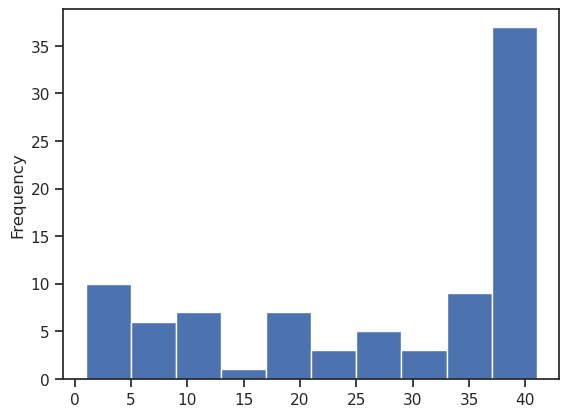

In [65]:
dfpg_tot.trg_count.plot(kind="hist")